# Исследование интернет-магазина товаров для дома «Пока все ещё тут»

<a id="Начало_проекта"></a>

<div style="border:solid black 2px; padding: 20px">

На данных интернет-магазина «Пока все ещё тут» проведем исследовательский анализ и проверим выдвинутые гипотезы.

Интернет-магазин «Пока все ещё тут» продает товары для дома.

Доступны исторические данные о продажах товаров в разрезе покупателей по дням (также доступно время продаж по часам). Данные с 01.10.2018 по 31.01.2020 (данные 31.01.2020 неполные). По запросу отдела маркетинга мы планируем запустить персонализированные предложения для покупателей.

**Цель исследования** 
* Сегментировать покупателей по профилю потребления
* Выявить топовые категории
* Определить сезонность в разрезе категорий
* Исследовать тренд продаж по категориям
* Рассчитать средний чек по категориям
* Проверить гипотезы:
    * Средний чек в будний день выше среднего чека в выходной день
    * Средний чек в апреле 2019г. равен среднему чеку в мае 2019г.

**Ход исследования**

Данные о поведении пользователей получили из файла `ecom_dataset_upd.csv`. О качестве данных нам ничего не известно. Поэтому перед проверкой гипотез проведем обзор данных. 

Таким образом, исследование пройдёт в 7 этапов:
1. [Загрузка и обзор данных](#Загрузка_и_обзор_данных)
2. [Предобработка данных](#Предобработка_данных)
3. [Исследовательский анализ данных](#Исследовательский_анализ_данных)
4. [Сегментация покупателей на основе истории покупок](#Сегментация)
5. [Проверка гипотез](#Проверка_гипотез)
6. [Презентация](#Презентация)
7. [Итоги исследования](#Итоги_исследования)


**Описание данных**
* date — дата заказа;
* customer_id — идентификатор покупателя;
* order_id — иденцификатор заказа;
* product — наименование товара
* quantity — количество товара в заказе;
* price — цена товара.

</div>

[Начало_проекта](#Начало_проекта)

<a id="Загрузка_и_обзор_данных"></a>

## Загрузка и обзор данных

### Импортируем библиотеки. Считываем данные из csv-файла и сохраняем в переменную

In [1]:
import pandas as pd
import datetime as dt
import re
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats as st

In [2]:
data = pd.read_csv('ecom_dataset_upd.csv')

### Получим общую информацию о таблице

In [3]:
def data_info(data):
    print('-'*50)
    print('Первые 5 строк таблицы')
    print('-'*50)
    display(data.head())
    print('-'*50)
    print('Общая информация о таблице')
    print('-'*50)
    data.info()
    print('-'*50)
    print('Основные статистические данные')
    print('-'*50)
    display(data.describe().T)
    print('-'*50)
    print('Подсчет пропусков')
    print('-'*50)
    display(data.isna().sum())
    print('-'*50)
    print('Проверка явных дубликатов')
    print('-'*50)
    print(data.duplicated().sum())
    print('-'*50)

In [4]:
data_info(data)

--------------------------------------------------
Первые 5 строк таблицы
--------------------------------------------------


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


--------------------------------------------------
Общая информация о таблице
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB
--------------------------------------------------
Основные статистические данные
--------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
date,7474.0,2.018913e+09,427887.840663,2.018100e+09,2.019022e+09,2.019051e+09,2.019063e+09,2.020013e+09
order_id,7474.0,4.944988e+04,32679.642404,1.262400e+04,1.483300e+04,6.876800e+04,7.125775e+04,1.127890e+05
quantity,7474.0,2.362858e+00,14.500497,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+03
price,7474.0,4.787375e+02,901.615895,9.000000e+00,9.700000e+01,1.350000e+02,4.390000e+02,1.491700e+04


--------------------------------------------------
Подсчет пропусков
--------------------------------------------------


date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

--------------------------------------------------
Проверка явных дубликатов
--------------------------------------------------
0
--------------------------------------------------


<div style="border:solid green 2px; padding: 20px">

Структура данных:
* Количество строк: 7474.
* Количество столбцов: 6.
* Типы данных: object (2 столбца), float64 (1 столбец), int64 (3 столбца).
* Пропусков нет.
* Явных дубликатов нет.
* Все столбцы имеют корректный тип данных, кроме столбца date, изменим тип данных на дату и время.

</div>

[Начало_проекта](#Начало_проекта)

<a id="Предобработка_данных"></a>

## Предобработка данных

### Добавление столбцов с датой и временем

<div style="border:solid black 2px; padding: 20px">

Преобразуем данные из столбца с датой заказа. Изменим тип данных у столбца с датой и добавим столбцы с датой, временем в часах, днем недели, месяцем и годом.

</div>

In [5]:
data['date'] = pd.to_datetime(data['date'], format = '%Y%m%d%H')
data['day'] = pd.to_datetime(data['date']).dt.date
data['hour'] = pd.to_datetime(data['date']).dt.hour
data['weekday'] = data['date'].dt.isocalendar().day
data['month'] = pd.to_datetime(data['date']).dt.month
data['year'] = pd.to_datetime(data['date']).dt.year
data['month_year'] = data['date'].apply(lambda s: dt.date(s.year, s.month, 1))
data.head()

,date,customer_id,order_id,product,quantity,price,day,hour,weekday,month,year,month_year
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,0,1,10,2018,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,0,1,10,2018,2018-10-01
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,0,1,10,2018,2018-10-01
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,0,1,10,2018,2018-10-01
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,0,1,10,2018,2018-10-01


In [6]:
print('Начало периода:', data['date'].min())
print('Конец периода:', data['date'].max())
print('Период:', data['date'].max() - data['date'].min())

Начало периода: 2018-10-01 00:00:00
Конец периода: 2020-01-31 15:00:00
Период: 487 days 15:00:00


In [7]:
data.dtypes

date           datetime64[ns]
customer_id            object
order_id                int64
product                object
quantity                int64
price                 float64
day                    object
hour                    int32
weekday                UInt32
month                   int32
year                    int32
month_year             object
dtype: object

### Добавление столбца 'weekday_weekend'

<div style="border:solid black 2px; padding: 20px">

Присвоим пон-пят значение будний, а суб и вос значение выходной.

</div>

In [8]:
data['weekday'].value_counts()

weekday
1    1276
2    1246
4    1124
3    1068
5    1012
7     953
6     795
Name: count, dtype: Int64

In [9]:
# функция возвращает категорию по значению от weekday, используя правила:
def weekday(row): 
    if row['weekday'] <= 5:
        return 'будний'
    elif row['weekday'] <= 7:
        return 'выходной'
    return 'Нет данных'

data['weekday_weekend'] = data.apply(weekday, axis=1) # добавляем новый столбец

# проверяем категоризацию
data.groupby(['weekday', 'weekday_weekend'])['product'].agg('count')

weekday  weekday_weekend
1        будний             1276
2        будний             1246
3        будний             1068
4        будний             1124
5        будний             1012
6        выходной            795
7        выходной            953
Name: product, dtype: int64

### Добавление столбца 'store'

<div style="border:solid black 2px; padding: 20px">

Добавим столбец с названием интернет-магазина 'Пока все ещё тут' для удобства построения сводных по всему датафрейму.

</div>

In [10]:
data['store'] = 'Пока все ещё тут'
data.head(2)

,date,customer_id,order_id,product,quantity,price,day,hour,weekday,month,year,month_year,weekday_weekend,store
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,0,1,10,2018,2018-10-01,будний,Пока все ещё тут
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,0,1,10,2018,2018-10-01,будний,Пока все ещё тут


### Добавление столбца с итоговой суммой товара в заказе

<div style="border:solid black 2px; padding: 20px">

Добавим расчетный столбец с итоговой суммой товара в заказе, умножим цену товара на количество товара в заказе.

</div>

In [11]:
data['total_value'] = round(data['quantity'] * data['price'], 2)
data.head()

,date,customer_id,order_id,product,quantity,price,day,hour,weekday,month,year,month_year,weekday_weekend,store,total_value
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,0,1,10,2018,2018-10-01,будний,Пока все ещё тут,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,0,1,10,2018,2018-10-01,будний,Пока все ещё тут,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,0,1,10,2018,2018-10-01,будний,Пока все ещё тут,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,0,1,10,2018,2018-10-01,будний,Пока все ещё тут,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,0,1,10,2018,2018-10-01,будний,Пока все ещё тут,112.0


### Проверка неявных дубликатов

<div style="border:solid black 2px; padding: 20px">

Сделаем проверку на неявные дубликаты по столбцу 'product'.

</div>

In [12]:
data['product'].value_counts() # просмотр уникальных значений и количество строк

product
Рассада Кабачка сорт Зебра кассета 6 шт E6                                                     79
Рассада Кабачка сорт Золотинка кассета 6 шт E6                                                 78
Пеларгония розебудная Red Pandora укорененный черенок                                          77
Рассада Кабачка сорт Белогор кассета 6 шт E6                                                   77
Рассада Кабачка сорт Горный, кассета по 6шт                                                    76
                                                                                               ..
Средство для быстрого удаления жировых загрязнений DECS Антижир 500 мл Россия 4660015923259     1
Гладильная доска Dogrular Эко Инжи 110х33 см 224414                                             1
Кофр для хранения Hausmann средний 36х36х30 2 шт. 4c-202                                        1
Коврик придверный PHP SRL 40х68 см Format Tour 21717 Добро пожаловать 6008                      1
Литопс Микс 

In [13]:
print('Количество уникальных названий товара', data['product'].nunique())

Количество уникальных названий товара 2343


In [14]:
def remove_name(name):
    name_update = name.strip().lower() # удаление пробелов в начале и в конце ячейки
    name_update = name_update.lower() # переводим в нижний регистр
    name_update = re.sub('\W', ' ', name_update) # \W — любой символ кроме латиницы, цифр или нижнего подчёркивания
    return name_update

data['product_update'] = data['product'].apply(remove_name)

# первые 3 слова для категоризации товара
data['product_category'] = (data['product_update'].str.split().str[0] + ' ' + 
                            data['product_update'].str.split().str[1] + ' ' + 
                            data['product_update'].str.split().str[2])

data[['product', 'product_update', 'product_category']].head()

,product,product_update,product_category
0,"Комнатное растение в горшке Алое Вера, d12, h30",комнатное растение в горшке алое вера d12 h30,комнатное растение в
1,"Комнатное растение в горшке Кофе Арабика, d12,...",комнатное растение в горшке кофе арабика d12 ...,комнатное растение в
2,Радермахера d-12 см h-20 см,радермахера d 12 см h 20 см,радермахера d 12
3,Хризолидокарпус Лутесценс d-9 см,хризолидокарпус лутесценс d 9 см,хризолидокарпус лутесценс d
4,Циперус Зумула d-12 см h-25 см,циперус зумула d 12 см h 25 см,циперус зумула d


In [15]:
data.groupby('product_update')['product'].nunique().sort_values(ascending=False)

product_update
роза кордана белая d 10 см h 20                                                            2
роза патио оранжевая d 12 см h 30                                                          2
стакан для ванной комнаты etna shiny керамика 12 5х9 5 см коричневый  spirella  1016116    1
средство для мытья пола ecomatic green cleaner 1000 мл испания 126109                      1
средство для мытья полов decs bleach лимон 1000 мл россия 4660015923273                    1
                                                                                          ..
муляж вишня  вишневый  3 см  10 шт  полиуретан  fancy fair ff cr30 10                      1
муляж вишня 3 см 10 шт полиуретан                                                          1
муляж вишня на магните                                                                     1
муляж гранат 9 см красный                                                                  1
ёрш унитазный с подставкой wc  стандарт   мультипласт 1

In [16]:
data.groupby('product_category')['product'].nunique().sort_values(ascending=False)

product_category
сушилка для белья                   112
рассада зелени для                   68
сумка тележка хозяйственная          61
штора для ванной                     45
гладильная доска ника                34
                                   ... 
незабудка смесь 0                     1
нетканые салфетки в                   1
нефролепис бостон d                   1
нивянник ромашка крупноцветковый      1
патиссон диск раннеспелый             1
Name: product, Length: 1366, dtype: int64

<div style="border:solid green 2px; padding: 20px">

Преобразовали столбец с наименованием товара ('product_update'). При таком изменении уведели, что было 2 неявных дубликата товара. Не удаляли числа и латинские буквы из названий, чтобы корректно сделать категоризацию товара. Много аналогов по товару.

Создали столбец из первых трех слов для категоризации товара ('product_category').

</div>

### Категоризация товара

<div style="border:solid black 2px; padding: 20px">

Определим категорию товара на основе наименования товара.
Для этого создадим словарь.

</div>

In [17]:
dict = {

'стирка, уборка, глажка': ['для мытья', 'ёрш унитазный', 'ерш для туалета', 'гладильн', 'для стирк',
                 'чехол eurogold reflector', 'вантуз', 'кондиционер для белья', 'щетка', 'урна',
                 'сушилка', 'сметка', 'для мытья посуды', 'бак для белья', 'чистящий крем',
                 'подкладка под чехол', 'стяжки для чехла', 'подрукавник', 'прищеп', 'перчатки', 'стирал', 
                 'швабра', 'веник', 'насадка для швабры', 'насадка к швабре', 'средство', 
                 'антижир', 'чехол eurogold clean', 'ароматизированное средство', 'сетка для глажения',
                 'рукав для гла', 'тряпкодержатель', 'окномойка', 'насадка отжим', 'таз', 'ведро',  
                 'мусорный контейнер', 'чехол eurogold clean', 'ёрш радиаторный', 'держатель для',
                 'контейнер для мусора', 'ролик для чистки', 'сменный блок', 'насадка для ведра', 'корыто', 
                 'ткань универсальная', 'средство против засоров', 'совок', 'ткань для окон', 
                 'запасная насадка', 'тряпка', 'отбеливатель', 'ткань для гигиенич', 'мешок для деликатной',
                 'насадка моп rozenbal', 'набор махровых салфеток', 'скребок', 'гипоаллергенный концентрированный гель',
                 'отжим для ведра', 'набор vileda easy', 'сменная насадка', 'антинакипин для утюгов'],
    
'ремонт, инструменты': ['шпингалет', 'стремянк', 'стяжка', 'петля', 'пружин', 'сверл', 'набор сверел', 'крючок', 
                        'сварка', 'угольник', 'бензин', 'паста для полировки', 'ручка скоба', 'инструмент', 'веревка',
                        'линейка', 'шило', 'фал капроновый', 'завертка форточная', 'ручка мебельная',
                        'штангенциркуль', 'основание для пробки', 'решетка вентиляционная', 'уголок оконный', 
                        'мешок для строител', 'шнур', 'шпагат полипропилен', 'напильник', 'фиксатор', 'насадка на валик'],

'сумка-тележка': ['тележк', 'сумка'],

'интерьер': ['муляж', 'подставка для обуви', 'ящик', 'коврик', 'ковер', 'ковёр', 'термометр', 'вешалк',
             'искусственный', 'искуственных', 'кофр для хранения медикаментов', 'комплект постельного',
             'наматр', 'плед', 'простын', 'подушк','карниз', 'короб', 'светильник', 'кофр',
             'комод', 'покрывало', 'одеяло', 'этажерка', 'фоторамка', 'ключница', 'комплект махровых салфеток',
             'искусственная лиана', 'полки', 'искусственная композиция', 'халат', 'ваза', 'скатерть',
             'набор вешалок', 'плечик', 'корзина', 'чехол для одежды', 'чехол для костюма', 'чехол для платья',
             'постельное белье', 'полка для обуви', 'вакуумный пакет', 'стеллаж', 'подставка для цветов', 'лоток',
             'корзинка с крышкой', 'пуф', 'наволочка', 'обувница', 'пододеяльник', 'чехол для короткой'],

'кухонная утварь': ['тарелка', 'форма для выпе', 'орехоколка', 'сковород', 'чайник заварочный', 'скатерть',
                         'кувшин', 'толкушк', 'чайник эмалированный', 'ёрш для бутылки', 'банка', 'салфетк',
                         'tepмокруж', 'кружк', 'кружек', 'фужер', 'стакан', 'вилк', 'ложк', 'нож', 'мантоварка',
                         'противень', 'вкладыши для хранения', 'контейнер для овощей', 'масленка',
                         'салатник', 'чайный набор', 'терка', 'лопатка', 'овощеварка', 'рыбочистка', 'салфетница',
                         'овощечистка', 'губка спираль', 'лоток для холодца', 'контейнер для приготовления', 'бокал',
                         'кисточка силиконовая', 'картофелемялка', 'рассекатель пламени', 'набор форм для',
                         'миска', 'пресс для чеснока', 'скребок кондитерский', 'набор столовых приборов', 'защитный экран',
                         'термос', 'контейнер для свч', 'блюдце', 'разделочная', 'бульон', 'контейнер герметичный',
                         'электроштопор', 'хлебница', 'кастрюля', 'контейнер для продуктов', 'просеиватель',
                         'форма аlpenkok', 'емкость для свч', 'сотейник', 'сито', 'емкость для соуса',
                         'блюдо', 'соковыжималка', 'котел', 'скалка', 'защитная соль', 'измельчитель овощей',
                         'ополаскиватель для посу', 'венчик', 'тортниц', 'чайник со свистком', 'ёрш бутылочный',
                         'пьезозажигалка', 'сахарница', 'подставка для яйца', 'отделитель', 'половник', 'соковарка',
                         'крышка', 'бидон', 'шприц', 'набор для пикника', 'набор посуды', 'банка рондо'],
    
'рассада и саженцы': ['рассада', 'огурец', 'томат', 'укроп', 'морковь', 'настурция', 'рудбекия',
                      'многолетнее растение', 'гвоздика', 'дыня', 'арбуз', 'виноград', 'хоста', 'хризантема',
                      'баклажан', 'черенок', 'в кассете', 'роза чайно гибридная', 'монарда', 'бакопа ампельная',
                      'роза садовая', 'клубника', 'земляника', 'тюльпан', 'патиссон', 'горох', 'розмарин',
                      'калла', 'зверобой', 'клен', 'флокс', 'петрушка', 'фуксия прямостоячая',
                      'салат', 'буддлея', 'вербейник', 'ель канадская', 'осина', 'бегония', 'кипарисовик', 'калла',
                      'георгина', 'горох амброзия', 'гайлардия', 'крокусы',
                      'базилик', 'цинния', 'вербена', 'молодило', 'котовник', 'тимьян', 'артемизия',
                      'незабудка', 'пиретрум', 'ранункулус', 'календула', 'капуста', 'бархатцы', 'космея',
                      'петуния', 'лапчатка', 'львиный', 'алиссум', 'годеция', 'кореопсис', 'цинерария',
                      'эшшольция', 'табак', 'овсянница', 'фуксия', 'лобелия', 'змееголовник', 'физостегия',
                      'платикодон', 'мята', 'чабер', 'лаванда', 'калибрахоа', 'колокольчик', 'мускари',
                      'виола', 'аквилегия', 'седум', 'подсолнечник', 'смолевка', 'лилейник', 'папоротник',
                      'тагетис', 'циния', 'эхинацея', 'ясколка', 'энотера', 'сантолина', 'вероника',
                      'астра', 'кабачок', 'тыква', 'лаватера', 'анемона', 'камнеломка', 'лен', 'бадан',
                      'нивянник', 'вигна лилиана', 'барвинок', 'солидаго', 'любисток', 'валериана',
                      'портулак', 'газания', 'стимул', 'целозия', 'сальвия', 'шалфей', 'сциндапсус',
                      'лук порей', 'сельдерей листовой', 'подвесное кашпо'],
    
'комнатное растение': ['комнатное растение', 'комнатн', 'пеларгония', 'хризолидокарпус', 'спатифиллум',
                       'шеффлера', 'юкка', 'циперус', 'суккулент', 'дендробиум', 'каланхое', 'литопс',
                       'нолина', 'калатея', 'азалия', 'гортензия', 'афеляндра', 'примула', 'душица',
                       'эхеверия', 'лавр', 'хлорофитум', 'эвкалипт', 'дерево', 'антуриум', 'пуансеттия',
                       'цикламен', 'в кашпо', 'цитрофортунелла', 'лантана', 'диффенбахия', 'роза кордана',
                       'эхинокактус', 'пеперомия', 'хамедорея', 'замиокулькас', 'каллуна', 'фикус',
                       'гипсофила', 'кампанула', 'радермахера', 'адиантум', 'иссоп', 'подарочный набор',
                       'мелисса', 'фиалка', 'альбука', 'бальзамин', 'крассула', 'калоцефалус', 
                       'алоэ вера', 'роза мини', 'декабрист', 'мединилла', 'мимоза', 'пуансетия',
                       'импатиенс', 'фаленопсис', 'роза патио', 'кофе', 'аспарагус', 'капсикум', 
                       'гимнокалициум', 'мирт', 'скиммия', 'гардения', 'муррайя', 'фатсия', 'пахира',
                       'нефролепис', 'синнингия', 'амариллис', 'фиттония', 'эпипремнум', 'драцена',
                       'пряные травы', 'гиацинт', 'джункус', 'роза палас белая', 'роза кустовая ред',
                       'соланум', 'аптения', 'глоксиния', 'гербера', 'роза одноголовая'],
    
'товары для ванной': ['стакан для ванной', 'дозатор', 'штора', 'набор ковров для', 'увлажняющая маска',
                      'полотен', 'мыло', 'пена для ван', 'зубная паста', 'комплект для ванной',
                      'сиденье в ванну', 'подголовник для ванной', 'держатель для туал', 'пробка для ван', 
                      'мыльница', 'подголовник bacchetta', 'сиденье для ванны', 'штанга для ванной', 
                      'кольца для штор', 'паста зубная', 'ванна 70', 'штора для ванн', 'ковш пластмассовый'],
    
'мелкая техника': ['миксер', 'утюг', 'чайник электрический', 'фен дорожный', 'весы напольные', 
                   'пылесос', 'весы электронные', 'кипятильник', 'весы настольные электронные']
}

In [18]:
# функция соотносит значение словаря с наименованием товара и возвращает ключ словаря

def get_key(product):
    for k, v in dict.items():
        for i in v:
            if i in product:
                return k
    return 'НЕТ категории'

data['category'] = data['product_category'].apply(get_key)
data.groupby('category')['product_update'].nunique().sort_values(ascending=False)

category
рассада и саженцы         648
интерьер                  414
стирка, уборка, глажка    410
кухонная утварь           284
комнатное растение        277
сумка-тележка             106
товары для ванной          94
ремонт, инструменты        86
мелкая техника             22
Name: product_update, dtype: int64

<div style="border:solid green 2px; padding: 20px">

Итого получилось 9 категорий.

</div>

### Проверка аномалий: 1 заказ = 1 покупатель

<div style="border:solid black 2px; padding: 20px">

Проверим:
* что номер заказа уникальный в разные дни;
* что у уникального заказа был один покупатель.

Удалим дубликаты.

</div>

In [19]:
# Группируем номер заказа и день заказа
duplicates = data.pivot_table(index=['order_id', 'day'] , values='product_update', aggfunc='count')\
                 .reset_index()
# Добавляем столбец для определения дубликатов
duplicates['boolean_order_day'] = duplicates['order_id'].duplicated()
duplicates.head(2)

,order_id,day,product_update,boolean_order_day
0,12624,2019-06-02,2,False
1,13547,2018-10-05,3,False


In [20]:
print('Количество дубликатов по номеру заказа:',
      duplicates[duplicates['boolean_order_day'] == True]['boolean_order_day'].count())
print('Количество уникальных заказов:', data['order_id'].nunique())
print('Количество строк в датафрейме:', len(data))

Количество дубликатов по номеру заказа: 379
Количество уникальных заказов: 3521
Количество строк в датафрейме: 7474


<div style="border:solid black 2px; padding: 20px">

Номер заказа неуникален. Удалим дубликаты.

</div>

In [21]:
# Создаем лист для удаления дубликатов
list_dup_order_id = duplicates[duplicates.duplicated(['order_id'])]['order_id'].unique()

# Находим индексы заказов, среди которых есть дубликаты
dup = data.query('order_id in @list_dup_order_id')

data_dup = (dup.groupby(['order_id', 'day'])
       .apply(lambda x: x.index.tolist())    
       .reset_index(name='idx'))
data_dup['boolean'] = data_dup['order_id'].duplicated()

# Создаем список индексов только дубликатов
idx_dup = data_dup[data_dup['boolean'] == True]['idx'].reset_index()
idx_dup = idx_dup['idx'].tolist()
idx_dup = sum(idx_dup, [])

# Удаляем дубликаты и делаем проверку по количеству удаленных строк
len_before_first = len(data)
print('Количество строк до удаления дубликатов:', len_before_first) 
data = data.drop(index=idx_dup)
print('Количество строк после удаления дубликатов:', len(data))

Количество строк до удаления дубликатов: 7474
Количество строк после удаления дубликатов: 5747


<div style="border:solid black 2px; padding: 20px">

Проверим и удалим дубликаты номера заказа по:
* наименованию товара
* цене товара
* количеству товара в заказе

</div>

In [22]:
print('Количество дубликатов по номеру заказа, наименованию товара, цене товара и количеству товара:',
      data.duplicated(subset=['order_id', 'product_update', 'price', 'quantity']).sum())

Количество дубликатов по номеру заказа, наименованию товара, цене товара и количеству товара: 201


In [23]:
# Удаляем дубликаты и делаем проверку по количеству удаленных строк
len_before_drop = len(data)
print('Количество строк до удаления дубликатов:', len_before_drop) 
data = data.drop_duplicates(subset=['order_id', 'product_update', 'price', 'quantity'], keep='last')
print('Разница строк после удаления дубликатов (проверка):', len_before_drop - len(data))
print('Количество строк после удаления дубликатов:', len(data))

Количество строк до удаления дубликатов: 5747
Разница строк после удаления дубликатов (проверка): 201
Количество строк после удаления дубликатов: 5546


<div style="border:solid black 2px; padding: 20px">

Проверим и удалим дубликаты номера заказа, если у заказа больше 1 покупателя.

</div>

In [24]:
order_dup = data.pivot_table(index=['order_id', 'customer_id'] , values='product', aggfunc='count')\
                .reset_index()
order_dup['boolean_order'] = order_dup['order_id'].duplicated()
print('Количество дубликатов:', order_dup[order_dup['boolean_order'] == True]['boolean_order'].count())

Количество дубликатов: 0


In [25]:
print('Итого удалили строк:', len_before_first - len(data))

Итого удалили строк: 1928


<div style="border:solid green 2px; padding: 20px">

Удалили дубликаты:
 * дублирующиеся номера заказов по дням;
 * дублирующиеся номера заказов по наименованию товара, цене товара, количеству товара в заказе;
 * проверили, что у одного заказа один покупатель.

</div>

### Проверка аномальных значений по покупателям

<div style="border:solid black 2px; padding: 20px">

Проверим сумму потраченных денег по покупателям.

</div>

In [26]:
# строим сводную таблицу
customer = data.pivot_table(index='customer_id', values='total_value', aggfunc='sum')\
               .reset_index().sort_values('total_value', ascending=False)
customer['Доля'] = round((customer['total_value'] / customer['total_value'].sum()) * 100, 2)
customer.head(10)

,customer_id,total_value,Доля
463,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,675000.0,14.67
1899,c971fb21-d54c-4134-938f-16b62ee86d3b,159508.0,3.47
734,4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278.0,1.24
829,58a4c3cc-504f-43ea-a74a-bae19e665552,53232.0,1.16
198,146cd9bf-a95c-4afb-915b-5f6684b17444,49432.0,1.07
691,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,41900.0,0.91
1347,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,33680.0,0.73
983,6987e6d6-a63a-4ce2-a2d0-f424092d235e,32718.0,0.71
266,1b2764ad-9151-4051-a46a-9b01b62e6335,24370.0,0.53
1493,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,22056.0,0.48


In [27]:
print('Количество уникальных покупателей:', len(data['customer_id'].unique()))

Количество уникальных покупателей: 2430


In [28]:
# основные статистические даннные по столбцу 'total_value'
round(customer['total_value'].describe(), 0)

count      2430.0
mean       1893.0
std       14329.0
min          15.0
25%         389.0
50%         834.0
75%        1798.0
max      675000.0
Name: total_value, dtype: float64

In [29]:
print('Количество покупателей с суммой покупок больше 30000:',
      len(customer[customer['total_value'] > 30000]['customer_id']))

Количество покупателей с суммой покупок больше 30000: 8


In [30]:
# смотрим состав заказов на большие суммы
data\
.query('customer_id == "312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6"')[['day', 'product_update', 'quantity', 'total_value']]

,day,product_update,quantity,total_value
5456,2019-06-18,вантуз с деревянной ручкой d14 см красный bur...,1000,675000.0


<div style="border:solid black 2px; padding: 20px">

Данного покупателя с одним аномальным заказом удалим. Сильно сдвинет сезонность.

</div>

In [31]:
# смотрим состав заказов на большие суммы
data\
.query('customer_id == "c971fb21-d54c-4134-938f-16b62ee86d3b"')[['month', 'product_update', 'quantity', 'total_value']]\
.sort_values('quantity', ascending=False).head(10)

,month,product_update,quantity,total_value
160,10,стяжка оконная с болтом ст 55 цинк 1108354,64,1216.0
2022,2,салфетка на стол 30x45 см из бамбука napa 221,13,1898.0
881,11,таз пластмассовый 6 0 л пищевой квадратный тю...,13,1196.0
876,11,салфетка protec textil lino 30х43 см шоколад 6222,12,2424.0
1730,2,контейнер для мусора доминик curver 25 л сереб...,10,7480.0
188,10,искусственный цветок роза бархатная с закрытым...,10,710.0
187,10,декоративная композиция искуственных цветов бу...,10,1060.0
2082,3,дендробиум фиолетовый россия 10 штук в упаковке,10,670.0
2062,2,цветок искусственный ландыш 20 см пластик,10,350.0
64,10,набор прищепок большие пластиковые rozenbal пи...,10,860.0


<div style="border:solid black 2px; padding: 20px">

Не удаляем. В больших количествах товар, который под определенные нужны может закупаться в таком объеме.

</div>

In [32]:
# смотрим состав заказов на большие суммы
data\
.query('customer_id == "4d93d3f6-8b24-403b-a74b-f5173e40d7db"')[['month', 'product_update', 'quantity', 'total_value']]\
.sort_values('quantity', ascending=False).head(15)

,month,product_update,quantity,total_value
282,10,щетка утюжок с ручкой миди standart york g1126,50,2200.0
281,10,щетка для посуды мила sv3182 1807009,50,1350.0
233,10,петля приварная гаражная d 14х90 мм с шаром 1...,50,1900.0
164,10,крючок одежный тройной латунь б 47 1110182,25,1425.0
375,10,веник сорго с деревянной ручкой с 4 мя швами ...,17,9010.0
42,10,щетка сметка 3 х рядная деревянная 450 мм пло...,15,735.0
43,10,щетка сметка 4 х рядная деревянная 300 мм фиг...,15,1050.0
93,10,ёрш унитазный с деревянной ручкой ваир 1712012,15,840.0
50,10,герань домашняя пеларгония зональная цветуща...,11,1562.0
384,10,муляж гранат 9 см красный,10,560.0


<div style="border:solid black 2px; padding: 20px">

Удаляем покупателя. Вряд ли кому-то в одну покупку для себя понадобилось столько щеток, веников, ершиков.

</div>

In [33]:
# смотрим состав заказов на большие суммы
data\
.query('customer_id == "58a4c3cc-504f-43ea-a74a-bae19e665552"')[['month', 'product_update', 'quantity', 'total_value']]\
.sort_values('quantity', ascending=False).head(10)

,month,product_update,quantity,total_value
1518,1,простынь вафельная 200х180 см wellness rw180 0...,27,47385.0
1469,1,простынь вафельная 200х180 см wellness rw180 0...,3,5847.0


<div style="border:solid black 2px; padding: 20px">

Данного покупателя с большим заказом дорогой простыни удалим.

</div>

In [34]:
# смотрим состав заказов на большие суммы
data\
.query('customer_id == "146cd9bf-a95c-4afb-915b-5f6684b17444"')[['month', 'product_update', 'quantity', 'total_value']]\
.sort_values('quantity', ascending=False).head(10)

,month,product_update,quantity,total_value
5071,6,вешалки мягкие для деликатных вещей 3 шт шоколад,334,49432.0


<div style="border:solid black 2px; padding: 20px">

Данного покупателя с одним аномальным заказом удалим. Дешевый товар, но большое значение в штуках, создаст перекос по данному параметру.

</div>

In [35]:
# смотрим состав заказов на большие суммы
data\
.query('customer_id == "498f12a4-6a62-4725-8516-cf5dc9ab8a3a"')[['month', 'product_update', 'quantity', 'total_value']]\
.sort_values('quantity', ascending=False).head(10)

,month,product_update,quantity,total_value
2969,4,салфетка protec textil polyline 30х43 см амети...,60,11460.0
2970,4,наматрацник natures бархатный бамбук бб н 1 2 ...,12,14196.0
2971,4,одеяло wellness t142 белое темостеганое 140х20...,10,15680.0
2972,4,таз пластмассовый строительный круглый 40 л 1...,3,564.0


<div style="border:solid black 2px; padding: 20px">

Не удаляем.

</div>

In [36]:
# смотрим состав заказов на большие суммы
data\
.query('customer_id == "8fba3604-ef57-4b9f-b2fe-3402fa8825c8"')[['month', 'product_update', 'quantity', 'total_value']]\
.sort_values('quantity', ascending=False).head(10)

,month,product_update,quantity,total_value
1023,11,набор ножей attribute chef 5 предметов akf522,64,29248.0
1026,11,нож кухонный универсальный с пластмассовой руч...,24,2856.0
1024,11,нож кухонный для мяса с пластмассовой ручкой 3...,6,762.0
1025,11,нож кухонный для овощей с деревянной ручкой 31...,3,426.0
1022,11,кухонные ножницы webber из нержавеющей стали с...,2,254.0
1027,11,рыбочистка с деревянной ручкой с ножом 1518024,2,134.0


<div style="border:solid black 2px; padding: 20px">

Данного покупателя с большим заказом ножей удалим.

</div>

In [37]:
# смотрим состав заказов на большие суммы
data\
.query('customer_id == "6987e6d6-a63a-4ce2-a2d0-f424092d235e"')[['month', 'product_update', 'quantity', 'total_value']]\
.sort_values('quantity', ascending=False).head(10)

,month,product_update,quantity,total_value
1299,12,тележка багажная delta тбр 22 синий грузоподъе...,57,32718.0


<div style="border:solid black 2px; padding: 20px">

Данного покупателя с большим заказом тележек удалим.

</div>

In [38]:
# смотрим состав заказов на большие суммы
data\
.query('customer_id == "1b2764ad-9151-4051-a46a-9b01b62e6335"')[['month', 'product_update', 'quantity', 'total_value']]\
.sort_values('quantity', ascending=False).head(10)

,month,product_update,quantity,total_value
661,11,урна уличная гео hobbyka хоббика 59 37 5см...,5,24370.0


<div style="border:solid black 2px; padding: 20px">

Не удаляем. Товар дорогой, но купить 5 урн вполне реально.

</div>

In [39]:
# смотрим состав заказов на большие суммы
data\
.query('customer_id == "9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f"')[['month', 'product_update', 'quantity', 'total_value']]\
.sort_values('quantity', ascending=False).head(10)

,month,product_update,quantity,total_value
417,10,вешалка для блузок 41 см черный attribute ahm791,9,450.0
416,10,вешалка деревянная с расширенными плечиками и ...,8,2096.0
418,10,вешалка с закругленными плечиками без переклад...,7,742.0
424,10,короб стеллажный с крышкой малый 28 30 16 см ...,3,1572.0
427,10,набор вешалок мягких тканевых с перекладиной 3...,2,554.0
426,10,кофр для хранения медикаментов hausmann 9 отде...,2,1348.0
436,10,щетка для посуды из искусственного волокна и п...,2,254.0
422,10,коврик придверный грязеулавливающий резиновый ...,1,284.0
423,10,короб стеллажный с крышкой большой 30 40 25 с...,1,674.0
421,10,коврик влаговпитывающий ребристый 60х90 см ста...,1,412.0


<div style="border:solid black 2px; padding: 20px">

Не удаляем. Данный товар может закупаться в таком объеме.

</div>

In [40]:
# удалим выборочных покупателей, отмеченных выше
print('Количество строк до:', len(data))
data = data.query('customer_id != ["312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6", "4d93d3f6-8b24-403b-a74b-f5173e40d7db",\
                                   "58a4c3cc-504f-43ea-a74a-bae19e665552", "146cd9bf-a95c-4afb-915b-5f6684b17444",\
                                   "8fba3604-ef57-4b9f-b2fe-3402fa8825c8", "6987e6d6-a63a-4ce2-a2d0-f424092d235e"]')
print('Количество строк после удаления аномальных покупателей:', len(data))

Количество строк до: 5546
Количество строк после удаления аномальных покупателей: 5490


In [41]:
print('Итого удалили в датафрейме:', len_before_first - len(data))

Итого удалили в датафрейме: 1984


<div style="border:solid green 2px; padding: 20px">

Удалили 6 покупателей с аномальными заказами, чтобы данные заказы не влияли на сезонность.

</div>

### Проверка, что количество в заказе и цена товара положительные значения

<div style="border:solid black 2px; padding: 20px">

Проверим, что количество товара в заказе и цена товара больше или равно 0.

</div>

In [42]:
print('Количество товара в заказе меньше 0:', len(data.query('quantity <= 0')))

Количество товара в заказе меньше 0: 0


In [43]:
print('Цена товара меньше 0:', len(data.query('price <= 0')))

Цена товара меньше 0: 0


<div style="border:solid green 2px; padding: 20px">

Значения цены товара и количества товара в заказе больше 0.

</div>

### Проверка аномалий по цене товара

<div style="border:solid black 2px; padding: 20px">

Проверим аномальные значения по цене товара.

</div>

In [44]:
# основные статистические даннные по столбцу 'total_value'
round(data['price'].describe(), 0)

count     5490.0
mean       529.0
std        976.0
min          9.0
25%         90.0
50%        150.0
75%        524.0
max      14917.0
Name: price, dtype: float64

In [45]:
price = data.pivot_table(index=['price', 'product_update'], values=['total_value', 'quantity'], aggfunc='sum')\
            .reset_index().sort_values('price', ascending=False)
display('Top-10 самых дорогих товаров', price.head(10))
display('Top-10 самых дешевых товаров', price.tail(10))

'Top-10 самых дорогих товаров'

,price,product_update,quantity,total_value
2661,14917.0,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0
2660,8737.0,сумка тележка хозяйственная andersen royal sho...,1,8737.0
2659,8437.0,сумка тележка хозяйственная andersen alu star ...,1,8437.0
2658,8077.0,сумка тележка хозяйственная rolser mnb019 rojo...,2,16154.0
2657,7724.0,стремянка 7 ступенчатая hailo 8040 707 xxl 13 ...,1,7724.0
2656,7679.0,сумка тележка хозяйственная rolser mnb017 fucs...,1,7679.0
2655,7679.0,сумка тележка хозяйственная rolser imx006 bass...,3,23037.0
2654,7597.0,сумка тележка хозяйственная rolser mou041 malv...,1,7597.0
2653,7424.0,гладильная доска leifheit airboard compact m p...,2,14848.0
2652,7349.0,урна уличная стальная сальвадор 02 021 0 46х11...,1,7349.0


'Top-10 самых дешевых товаров'

,price,product_update,quantity,total_value
6,10.0,огурец засолочный 0 3 г 4660010776102,1,10.0
7,10.0,петрушка итальянский гигант 2 г 4660010776553,1,10.0
3,10.0,кореопсис толл 0 1 г 4650091480258,2,20.0
9,10.0,укроп обильнолистный 3 0 г 4660010772562,4,40.0
10,10.0,цинния коралловая красавица 0 2 г 4660010773323,1,10.0
11,10.0,цинния оранжевый король 0 5 г 4660010770520,1,10.0
12,10.0,эшшольция карминный король 0 5 г 4660010770193,2,20.0
2,9.0,львиный зев волшебный ковер 0 05 г 4660010779639,2,18.0
1,9.0,горох амброзия 10 0 г 4660010772616,1,9.0
0,9.0,алиссум лобулярия снежные одежды 0 2 г 46500...,3,27.0


<div style="border:solid green 2px; padding: 20px">

Самые дорогие и самые дешевые товары соответствуют своему наименованию, реальной цене этого товара.

</div>

### Проверка доли продаж по категориям

<div style="border:solid black 2px; padding: 20px">

Проверим долю категории по выручке и продажам в штуках.

Если категория небольшая, то рассмотреть возможность объединения с большой категорией.

</div>

In [46]:
# проверка доли суммы продаж по категориям
category_value = data.pivot_table(index='category', values='total_value', aggfunc='sum')\
                    .reset_index().sort_values('total_value', ascending=False)
category_value['share'] = round((category_value['total_value']
                                 / category_value['total_value'].sum()) * 100, 2)
category_value

,category,total_value,share
6,"стирка, уборка, глажка",1028952.67,27.81
7,сумка-тележка,791154.25,21.39
0,интерьер,708912.84,19.16
1,комнатное растение,326381.82,8.82
2,кухонная утварь,260277.00,7.04
4,рассада и саженцы,242939.50,6.57
5,"ремонт, инструменты",169733.33,4.59
8,товары для ванной,133278.00,3.60
3,мелкая техника,37745.00,1.02


In [47]:
# проверка доли продаж в штуках по категориям
category_quantity = data.pivot_table(index='category', values='quantity', aggfunc='sum')\
                        .reset_index().sort_values('quantity', ascending=False)
category_quantity['share'] = round((category_quantity['quantity']
                                    / category_quantity['quantity'].sum()) * 100, 2)
category_quantity

,category,quantity,share
0,интерьер,3625,28.97
4,рассада и саженцы,2369,18.93
1,комнатное растение,1676,13.39
6,"стирка, уборка, глажка",1597,12.76
5,"ремонт, инструменты",1284,10.26
2,кухонная утварь,1258,10.05
7,сумка-тележка,384,3.07
8,товары для ванной,287,2.29
3,мелкая техника,35,0.28


<div style="border:solid black 2px; padding: 20px">

Маленькая доля продаж и в штуках, и в деньгах у категорий 'мелкая техника', 'товары для ванной'. Перенесем данные категории в 'интерьер'.

</div>

In [48]:
condition = (data['category'] == 'мелкая техника')
condition1 = (data['category'] == 'товары для ванной')
data['category'] = np.where(condition, 'интерьер', data['category'])
data['category'] = np.where(condition1, 'интерьер', data['category'])

In [49]:
# проверка доли суммы продаж по категориям
category_value = data.pivot_table(index='category', values='total_value', aggfunc='sum')\
                     .reset_index().sort_values('total_value', ascending=False)
category_value['Доля'] = round((category_value['total_value']
                                / category_value['total_value'].sum()) * 100, 2)
category_value

,category,total_value,Доля
5,"стирка, уборка, глажка",1028952.67,27.81
0,интерьер,879935.84,23.79
6,сумка-тележка,791154.25,21.39
1,комнатное растение,326381.82,8.82
2,кухонная утварь,260277.00,7.04
3,рассада и саженцы,242939.50,6.57
4,"ремонт, инструменты",169733.33,4.59


In [50]:
# проверка доли продаж в штуках по категориям
category_quantity = data.pivot_table(index='category', values='quantity', aggfunc='sum')\
                        .reset_index().sort_values('quantity', ascending=False)
category_quantity['Доля'] = round((category_quantity['quantity']
                                   / category_quantity['quantity'].sum()) * 100, 2)
category_quantity

,category,quantity,Доля
0,интерьер,3947,31.54
3,рассада и саженцы,2369,18.93
1,комнатное растение,1676,13.39
5,"стирка, уборка, глажка",1597,12.76
4,"ремонт, инструменты",1284,10.26
2,кухонная утварь,1258,10.05
6,сумка-тележка,384,3.07


<div style="border:solid green 2px; padding: 20px">

Итого получилось 7 категорий.

</div>

### Вывод по предобработке данных

<div style="border:solid blue 2px; padding: 20px">

**Изменение типов данных.**

'date' (дата заказа): изменили тип данных на datetime.

**Добавили столбцы:**


* дата
* время в часах
* дни недели
* месяц
* год
* делением дня недели на будний и выходной
* общий столбец со значением 'store'
* столбец с суммой товара в заказе

Сделали **категоризацию товара** по наименованию. Итого получилось 7 категорий:
* рассада и саженцы
* интерьер
* стирка, уборка, глажка
* комнатное растение
* ремонт, инструменты
* кухонная утварь
* сумка-тележка

**Удалили аномальные заказы:**

* удалили дубли номеров заказов, если они были в разные дни;
* удалили дубли номеров заказов, если они были в разные дни, где у одного номера заказа было 2 и больше покупателя;
* проверили, что у 1 заказа 1 покупатель.

**Удалили аномальных покупателей**, у которых была одна большая разовая покупка на одну позицию, чтобы это данные не влияли на сезонность категорий.

**Количество строк:**

* Было строк в датафрейме: 7474.
* Стало строк в датафрейме после удаления дубликатов и аномалий: 5490.
* Удалили строк: 1984.

</div>

[Начало_проекта](#Начало_проекта)

<a id="Исследовательский_анализ_данных"></a>

## Исследовательский анализ данных

### Основные параметры по продажам за весь период

<div style="border:solid black 2px; padding: 20px">

Выведем основные показатели продаж за весь период.

* Начало периода: 2018-10-01 00:00:00
* Конец периода: 2020-01-31 15:00:00
* Период: 487 days 15:00:00

Неполные данные за 31.01.2020. Оставим период как есть, так как недостающие данные за 31.01.2020 критично не изменят картину, а если уберем месяц, то уже не сможем сравнить тренд год к году по январю.

</div>

In [51]:
data_store = (data.pivot_table(index='store', values=['total_value', 'quantity', 'order_id'],
                   aggfunc={'total_value': 'sum', 'quantity': 'sum', 'order_id': 'nunique'})\
                  .reset_index())

data_store['avg_price'] = data_store['total_value'] / data_store['quantity']
data_store['avg_check'] = data_store['total_value'] / data_store['order_id']
data_store['UPT'] = data_store['quantity'] / data_store['order_id']

data_store.columns = ['Интернет-магазин', 'Количество заказов',
                      'Продажи в штуках', 'Выручка руб.', 'Средняя цена', 'Средний чек', 'UPT']
data_store = data_store[['Интернет-магазин', 'Выручка руб.', 'Продажи в штуках',
                         'Количество заказов', 'Средний чек', 'Средняя цена', 'UPT']]
data_store.style.format({'UPT':'{:.2f}','Средний чек':'{:.0f}','Средняя цена':'{:.0f}','Выручка руб.':'{:.0f}'})

,Интернет-магазин,Выручка руб.,Продажи в штуках,Количество заказов,Средний чек,Средняя цена,UPT
0,Пока все ещё тут,3699374,12515,3480,1063,296,3.60


<div style="border:solid green 2px; padding: 20px">

Выручка руб. 3.7М руб.

Средняя цена товара 296 р., но за счет количества штук в заказе средний чек 1063р. UPT: 3.6.

</div>

### Динамика основных показателей по месяцам

<div style="border:solid black 2px; padding: 20px">

Рассмотрим динамику основных показателей по месяцам.

</div>

In [52]:
data_total = (data.pivot_table(index='month_year', values=['total_value', 'quantity', 'order_id'],
                                aggfunc={'total_value': 'sum', 'quantity': 'sum', 'order_id': 'nunique'})\
                   .reset_index()\
                   .rename(columns= {'month_year': 'Месяц_год', 'quantity': 'Продажи в штуках',
                                           'total_value': 'Выручка руб.', 'order_id': 'Количество заказов'})
             )
data_total['Средняя цена'] = data_total['Выручка руб.'] / data_total['Продажи в штуках']
data_total['Средний чек'] = data_total['Выручка руб.'] / data_total['Количество заказов']
data_total['UPT'] = data_total['Продажи в штуках'] / data_total['Количество заказов']

data_total = data_total[['Месяц_год', 'Выручка руб.', 'Продажи в штуках',
                         'Количество заказов', 'Средний чек', 'Средняя цена', 'UPT']]
data_total.style.format({'Продажи в штуках':'{:.0f}', 'Выручка руб.':'{:.0f}',
                         'Средняя цена':'{:.0f}', 'Средний чек':'{:.0f}', 'UPT':'{:.2f}'})\
          .background_gradient(cmap='Blues', axis=0)

,Месяц_год,Выручка руб.,Продажи в штуках,Количество заказов,Средний чек,Средняя цена,UPT
0,2018-10-01,294157,1248,204,1442,236,6.12
1,2018-11-01,325668,1141,203,1604,285,5.62
2,2018-12-01,318397,950,283,1125,335,3.36
3,2019-01-01,177702,582,164,1084,305,3.55
4,2019-02-01,300274,940,285,1054,319,3.30
5,2019-03-01,251561,1038,247,1018,242,4.20
6,2019-04-01,316794,1457,267,1186,217,5.46
7,2019-05-01,234314,1543,181,1295,152,8.52
8,2019-06-01,177083,570,159,1114,311,3.58
9,2019-07-01,235290,560,198,1188,420,2.83


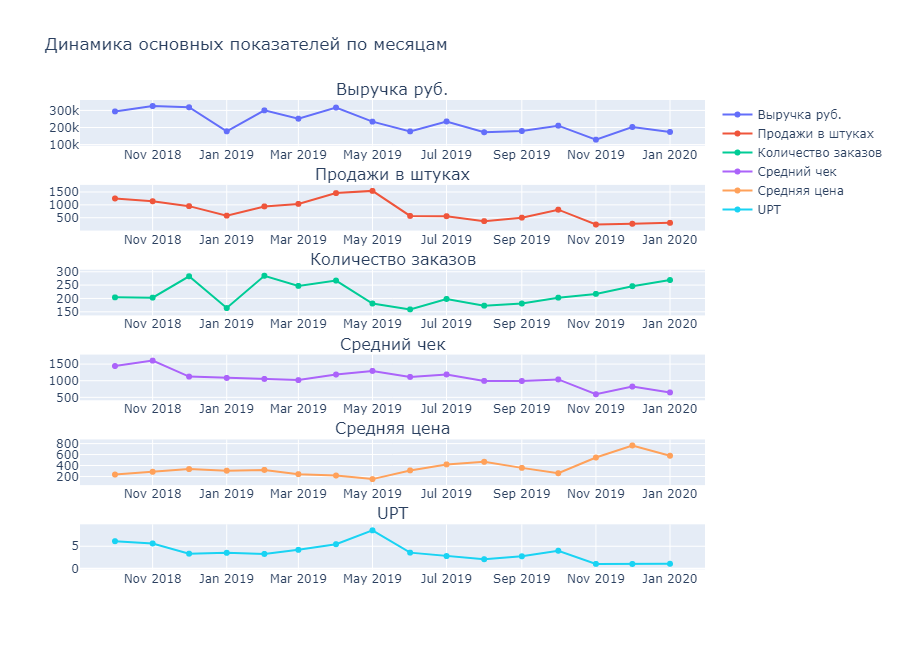

In [53]:
fig_total_month = make_subplots(rows = 6,cols = 1,
                                subplot_titles=('Выручка руб.', 'Продажи в штуках', 'Количество заказов',
                                                'Средний чек', 'Средняя цена', 'UPT'))
fig_total_month.append_trace(go.Scatter(x=data_total['Месяц_год'],
                                        y=data_total['Выручка руб.'],name='Выручка руб.'),row=1,col=1)
fig_total_month.append_trace(go.Scatter(x=data_total['Месяц_год'],
                                        y=data_total['Продажи в штуках'],name='Продажи в штуках'),row=2,col=1)
fig_total_month.append_trace(go.Scatter(x=data_total['Месяц_год'],
                                        y=data_total['Количество заказов'],name='Количество заказов'),row=3,col=1)
fig_total_month.append_trace(go.Scatter(x=data_total['Месяц_год'],
                                        y=data_total['Средний чек'],name='Средний чек'),row=4,col=1)
fig_total_month.append_trace(go.Scatter(x=data_total['Месяц_год'],
                                        y=data_total['Средняя цена'],name='Средняя цена'),row=5,col=1)
fig_total_month.append_trace(go.Scatter(x=data_total['Месяц_год'],
                                        y=data_total['UPT'],name='UPT'),row=6,col=1)
fig_total_month.update_layout(height=650,width=900,title='Динамика основных показателей по месяцам')
fig_total_month.show('png')

In [54]:
list_10_2018_01_2019 = [0, 1, 2, 3]
filter_10_2018_01_2019 = data_total[data_total.index.isin(list_10_2018_01_2019)].reset_index()\
                         .rename(columns= {'Выручка руб.': 'Выручка руб.1', 'Продажи в штуках': 'Продажи в штуках1',
                                           'Количество заказов': 'Количество заказов1', 'Средний чек': 'Средний чек1',
                                           'Средняя цена': 'Средняя цена1', 'UPT': 'UPT1'})
list_10_2019_01_2020 = [12, 13, 14, 15]
filter_10_2019_01_2020 = data_total[data_total.index.isin(list_10_2019_01_2020)].reset_index()

In [55]:
data_10_01 = pd.concat([filter_10_2018_01_2019, filter_10_2019_01_2020], axis=1)
data_10_01['Месяц'] = ['окт', 'ноя', 'дек', 'янв']

data_10_01['Выручка год к году'] = (round((data_10_01['Выручка руб.']
                                    / data_10_01['Выручка руб.1'] - 1) * 100, 0)).astype(str) + '%'

data_10_01['Продажи в штуках год к году'] = (round((data_10_01['Продажи в штуках']
                                             / data_10_01['Продажи в штуках1'] - 1) * 100, 0)).astype(str) + '%'

data_10_01['Количество заказов год к году'] = (round((data_10_01['Количество заказов']
                                               / data_10_01['Количество заказов1'] - 1) * 100, 0)).astype(str) + '%'

data_10_01['Средний чек год к году'] = (round((data_10_01['Средний чек']
                                        / data_10_01['Средний чек1'] - 1) * 100, 0)).astype(str) + '%'

data_10_01['Средняя цена год к году'] = (round((data_10_01['Средняя цена']
                                         / data_10_01['Средняя цена1'] - 1) * 100, 0)).astype(str) + '%'

data_10_01['UPT год к году'] = (round((data_10_01['UPT']
                                       / data_10_01['UPT1'] - 1) * 100, 0)).astype(str) + '%'

data_10_01 = data_10_01[['Месяц', 'Выручка год к году', 'Продажи в штуках год к году',
                         'Количество заказов год к году', 'Средний чек год к году',
                         'Средняя цена год к году', 'UPT год к году']]
slice = ['Количество заказов год к году', 'Средняя цена год к году']
data_10_01.style.set_properties(**{'background-color': '#ffffb3'}, subset=slice)

,Месяц,Выручка год к году,Продажи в штуках год к году,Количество заказов год к году,Средний чек год к году,Средняя цена год к году,UPT год к году
0,окт,-28.0%,-35.0%,-0.0%,-28.0%,10.0%,-35.0%
1,ноя,-60.0%,-79.0%,7.0%,-63.0%,91.0%,-81.0%
2,дек,-36.0%,-72.0%,-13.0%,-27.0%,128.0%,-68.0%
3,янв,-2.0%,-48.0%,64.0%,-40.0%,89.0%,-68.0%


<div style="border:solid green 2px; padding: 20px">

Продажи 2019 г. значительно упали относительно продаж 2020г.

Если сравнить год к году октябрь-январь, то видим, что продажи по выручке и штукам значительно упали. При этом суммарное количество заказов осталось на уровне периода 'до'. Вероятно, из-за роста средней цены стали меньше покупать штук в заказе, это видно по UPT.

В 2019 г. самое большое количество штук в заказе в мае, самая высокая выручка в апреле.

Падение продаж в штуках, а также рост средней цены в конце 2019г. может быть связан с началом пандемии.

</div>

### Продажи по категориям

<div style="border:solid black 2px; padding: 20px">

Проанализируем продажи по категориям за весь период.

Выделим топовые категории.

</div>

In [56]:
# строим сводную таблицу
data_category = data.pivot_table(index='category', values=['total_value', 'quantity'], aggfunc='sum')\
                    .sort_values('total_value', ascending=False).reset_index()\
                    .rename(columns = {'total_value': 'Выручка руб.',
                                       'category': 'Категория', 'quantity': 'Продажи в штуках'})
                    
data_category['Доля продаж по выручке'] = round((data_category['Выручка руб.']
                                                 / data_category['Выручка руб.'].sum()) * 100, 1)
data_category['Доля продаж по выручке'] = data_category['Доля продаж по выручке'].map('{:,.1f}%'.format)
data_category['Доля продаж по штукам'] = round((data_category['Продажи в штуках']
                                                / data_category['Продажи в штуках'].sum()) * 100, 1)
data_category['Доля продаж по штукам'] = data_category['Доля продаж по штукам'].map('{:,.1f}%'.format)

data_category[['Категория', 'Выручка руб.', 'Доля продаж по выручке', 'Продажи в штуках', 'Доля продаж по штукам']]\
             .style.format({'Выручка руб.':'{:.0f}'}).background_gradient(cmap='Blues', axis=0)\
             .set_caption('Продажи по категориям')

,Категория,Выручка руб.,Доля продаж по выручке,Продажи в штуках,Доля продаж по штукам
0,"стирка, уборка, глажка",1028953,27.8%,1597,12.8%
1,интерьер,879936,23.8%,3947,31.5%
2,сумка-тележка,791154,21.4%,384,3.1%
3,комнатное растение,326382,8.8%,1676,13.4%
4,кухонная утварь,260277,7.0%,1258,10.1%
5,рассада и саженцы,242940,6.6%,2369,18.9%
6,"ремонт, инструменты",169733,4.6%,1284,10.3%


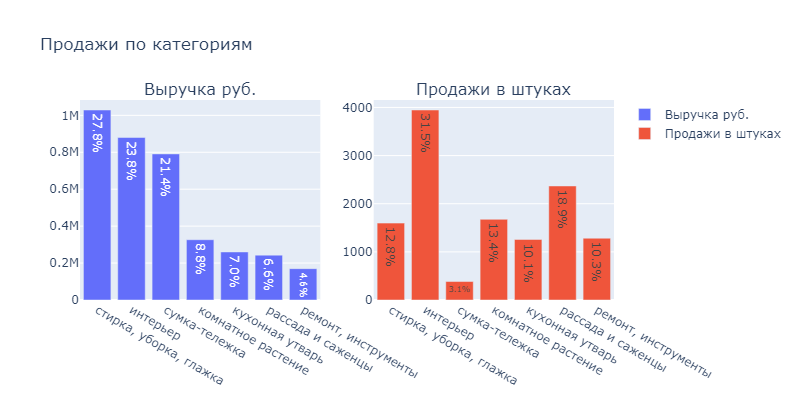

In [57]:
fig_fig_category = make_subplots(rows = 1, cols = 2, subplot_titles=('Выручка руб.', 'Продажи в штуках'))

fig_fig_category.append_trace(go.Bar(x=data_category['Категория'], y=data_category['Выручка руб.'],
                                     name='Выручка руб.', text=data_category['Доля продаж по выручке']),
                              row=1, col=1)
fig_fig_category.append_trace(go.Bar(x=data_category['Категория'], y=data_category['Продажи в штуках'],
                                     name='Продажи в штуках', text=data_category['Доля продаж по штукам']),
                              row=1, col=2)

fig_fig_category.update_layout(height=400,width=800,title='Продажи по категориям')
fig_fig_category.show('png')

<div style="border:solid green 2px; padding: 20px">

Top-3 категории по выручке (доля 73%):
 * стирка, уборка, глажка 27.8%
 * интерьер 23.8%
 * сумка-тележка 21.4%

У категорий 'стирка, уборка, глажка' и 'сумка-тележка' большая доля продаж в деньгах и значительно меньше доля продаж в штуках. Соответственно, в данных категориях высокая средняя цена товара.

В этой связи обратим внимание на категорию 'рассада и саженцы', где большая доля по продажам в штуках, но маленькая доля по выручке. Дешевый товар, который закупается в больших количествах в сезон.

</div>

### Динамика продаж по категориям по месяцам

<div style="border:solid black 2px; padding: 20px">

Проанализируем динамику продаж категорий по месяцам.

На графиках разобьем категории на группы.

* top: 'стирка, уборка, глажка', 'сумка-тележка', 'интерьер'
* bottom: 'кухонная утварь', 'комнатное растение', 'ремонт, инструменты',  'рассада и саженцы'

</div>

In [58]:
category_month_value = data.pivot_table(index='month_year', columns='category', values='total_value', aggfunc='sum')\
                           .rename(columns= {'month_year': 'Месяц_год', 'total_value': 'Выручка руб.',})

category_month_value.T.style.format("{:.0f}")\
                      .background_gradient(cmap='Blues', axis=1)\
                      .set_caption('Выручка руб. по месяцам')

month_year,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01
category,,,,,,,,,,,,,,,,
интерьер,68196,99305,80344,50490,65915,58705,66963,32617,51925,49954,35738,53250,57109,31396,42263,35765
комнатное растение,24118,17820,26746,23070,28294,37553,37204,28322,12603,21547,9832,15281,12912,10594,10514,9973
кухонная утварь,27185,24999,29607,27856,27272,18367,15646,12589,4236,8076,8014,23301,5992,8498,8977,9662
рассада и саженцы,4570,1549,2251,403,3113,11719,57043,84713,23280,15402,6562,4421,4513,6784,7284,9334
"ремонт, инструменты",26549,7679,15066,11453,6998,2833,5637,10535,11297,10090,13772,2164,25377,2833,6275,11175
"стирка, уборка, глажка",99088,96442,87058,46640,109637,63026,61463,25574,41233,85782,38017,42366,58439,39872,64478,69837
сумка-тележка,44451,77874,77325,17790,59045,59358,72838,39964,32509,44439,60187,38741,46433,28816,63094,28290


In [59]:
category_month_q = data.pivot_table(index='month_year', columns='category', values='quantity', aggfunc='sum')\
                       .rename(columns= {'month_year': 'Месяц_год', 'total_value': 'Продажи в штуках',})

category_month_q.T.style.format("{:.0f}")\
                  .background_gradient(cmap='Greens', axis=1)\
                  .set_caption('Продажи в штуках по месяцам')

month_year,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01
category,,,,,,,,,,,,,,,,
интерьер,353,645,202,176,395,410,333,368,185,177,104,111,306,55,66,61
комнатное растение,110,95,68,123,200,247,206,181,70,74,61,76,59,36,35,35
кухонная утварь,108,156,182,115,126,73,71,42,20,24,27,176,47,28,32,31
рассада и саженцы,31,17,27,4,21,182,673,746,187,143,47,35,36,62,64,94
"ремонт, инструменты",482,12,243,8,25,17,19,75,45,37,40,27,233,3,6,12
"стирка, уборка, глажка",137,181,187,147,147,81,126,116,43,86,47,52,107,40,42,58
сумка-тележка,27,35,41,9,26,28,29,15,20,19,42,26,25,12,20,10


In [60]:
category_month_total = data.pivot_table(index=['month_year', 'category'], values=['total_value', 'quantity'], aggfunc='sum')\
                           .reset_index()\
                           .rename(columns= {'month_year':'Месяц_год','total_value':'Выручка руб.',
                                                    'category':'Категория','quantity':'Продажи в штуках'})
category_month_total.head()

,Месяц_год,Категория,Продажи в штуках,Выручка руб.
0,2018-10-01,интерьер,353,68196.0
1,2018-10-01,комнатное растение,110,24118.0
2,2018-10-01,кухонная утварь,108,27185.0
3,2018-10-01,рассада и саженцы,31,4570.0
4,2018-10-01,"ремонт, инструменты",482,26549.0


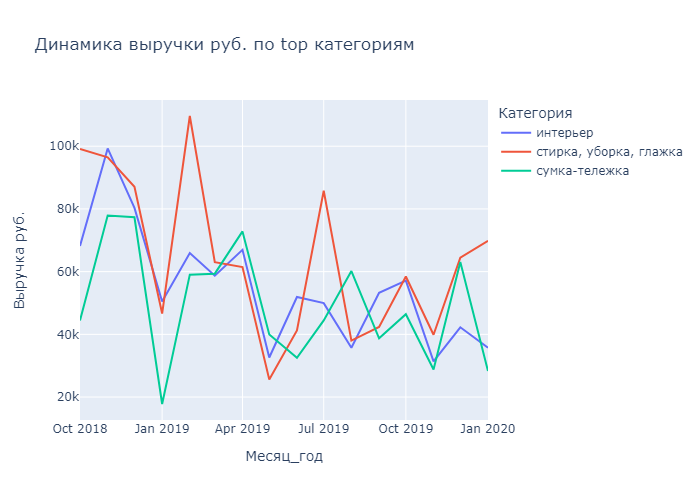

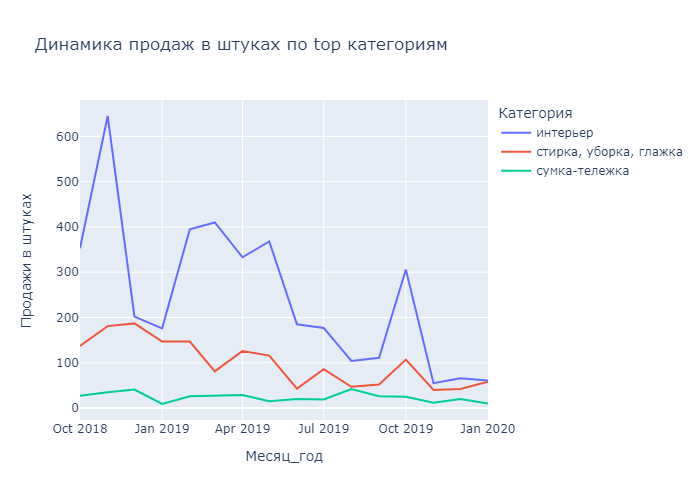

In [61]:
category_top_value = category_month_total.query('Категория == ["стирка, уборка, глажка", "сумка-тележка", "интерьер"]')

fig_category_top_value = px.line(category_top_value, x='Месяц_год', y='Выручка руб.',
                                 color='Категория', title='Динамика выручки руб. по top категориям')
fig_category_top_value.show('png')

fig_category_top_q = px.line(category_top_value, x='Месяц_год', y='Продажи в штуках',
                                 color='Категория', title='Динамика продаж в штуках по top категориям')
fig_category_top_q.show('png')

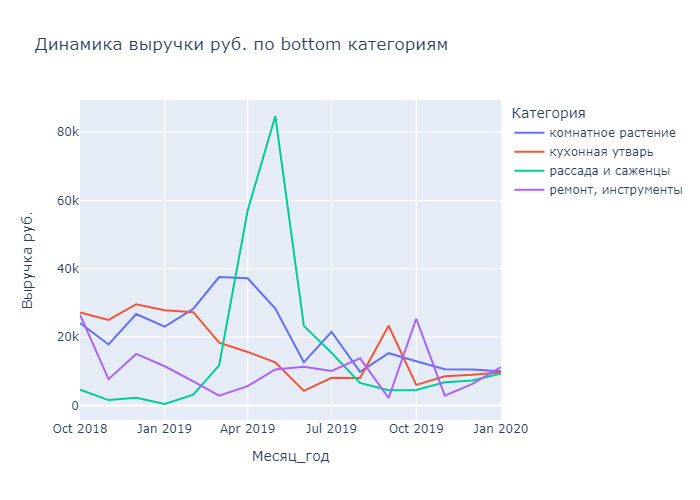

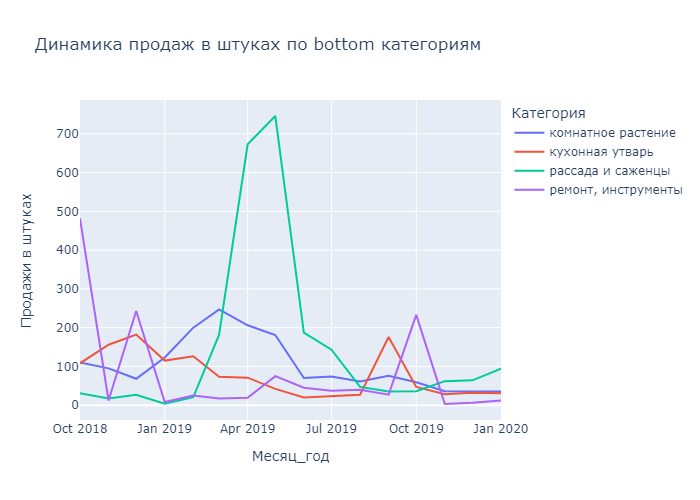

In [62]:
category_bottom_value = category_month_total.query('Категория == ["кухонная утварь", "комнатное растение", "ремонт, инструменты", "рассада и саженцы"]')

fig_category_bottom_value = px.line(category_bottom_value, x='Месяц_год', y='Выручка руб.',
                                 color='Категория', title='Динамика выручки руб. по bottom категориям')
fig_category_bottom_value.show('png')

fig_category_bottom_q = px.line(category_bottom_value, x='Месяц_год', y='Продажи в штуках',
                                 color='Категория', title='Динамика продаж в штуках по bottom категориям')
fig_category_bottom_q.show('png')

<div style="border:solid green 2px; padding: 20px">

У категорий 'рассада и саженцы' пик продаж в апреле-мае. Увеличение продаж рассады в мае не привело к соразмерному увеличению продаж других категорий, т.е. к увеличению продаж сопутствующего товара.

Интересны небольшие всплески продаж сентябре-октябре у ряда категорий, похоже на закрытие дачного сезона (уборка, ремонт).

У категории 'комнатное растение' пик продаж в марте, вероятно покупают данный товар как подарок на 8 марта.

В категории 'стирка, уборка, глажка' 2 пика продаж по выручке: февраль и июль.

</div>

### Средняя цена по категориям

<div style="border:solid black 2px; padding: 20px">

Проанализируем среднюю цену по категориям.

</div>

In [63]:
# выведем основные статистические данные по столбцу 'price'
data['price'].describe().round()

count     5490.0
mean       529.0
std        976.0
min          9.0
25%         90.0
50%        150.0
75%        524.0
max      14917.0
Name: price, dtype: float64

In [64]:
# выведем среднюю цену по категориям
category_avg_price = data.pivot_table(index='category', values=['total_value', 'quantity'], aggfunc='sum')\
                         .reset_index()\
                         .rename(columns= {'total_value':'Выручка руб.',
                                           'category':'Категория','quantity':'Продажи в штуках'})
category_avg_price['Средняя цена'] = round(category_avg_price['Выручка руб.']
                                           / category_avg_price['Продажи в штуках'], 0)
category_avg_price[['Категория', 'Средняя цена']].sort_values('Средняя цена', ascending=False)

,Категория,Средняя цена
6,сумка-тележка,2060.0
5,"стирка, уборка, глажка",644.0
0,интерьер,223.0
2,кухонная утварь,207.0
1,комнатное растение,195.0
4,"ремонт, инструменты",132.0
3,рассада и саженцы,103.0


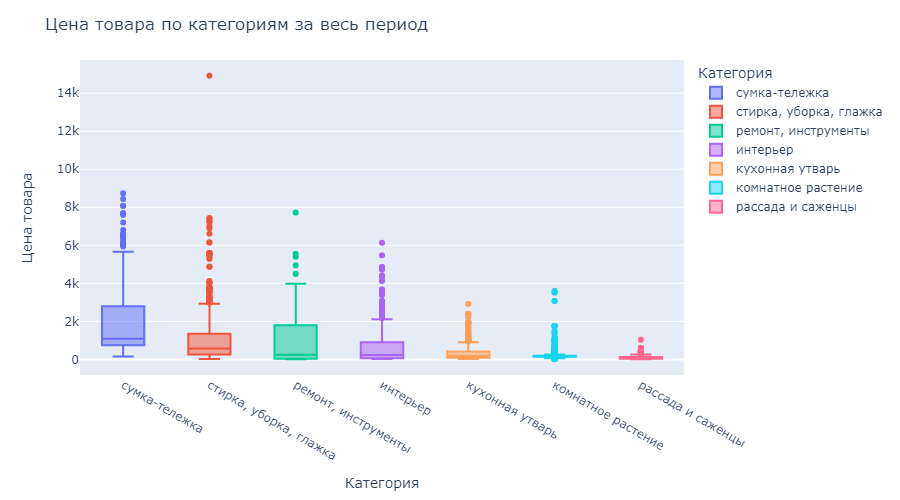

In [65]:
# добавляем столбец с медианой
data_price = data.rename(columns = {'category': 'Категория'})
data_price['meadian_price'] = data_price.groupby('Категория')['price'].transform('median')
# строим график "ящик с усами"
fig_price = px.box(data_price.sort_values(by='meadian_price', ascending=False),
                   x='Категория', y='price', color='Категория')
fig_price.update_layout(title='Цена товара по категориям за весь период',
                        yaxis_title='Цена товара',
                        xaxis_title='Категория', width=900, height=500)
fig_price.show('png')

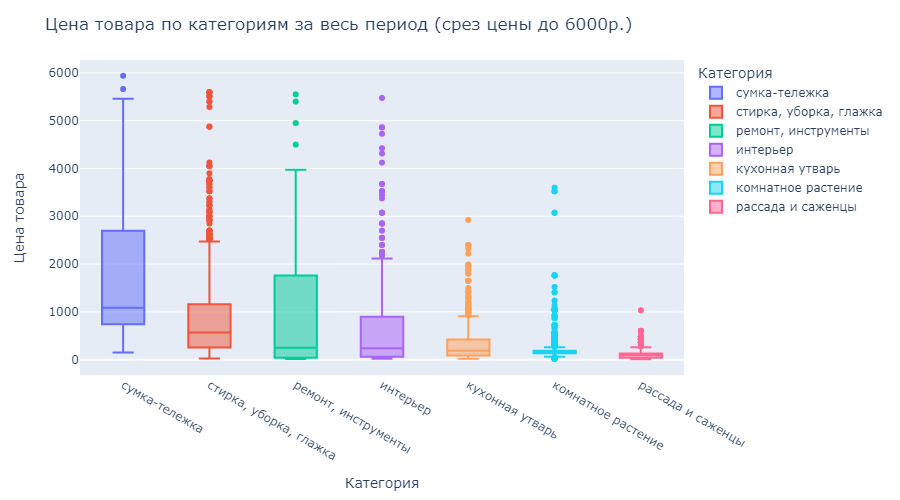

In [66]:
data_price_filter = data[data['price'] < 6000].rename(columns = {'category': 'Категория'})
data_price_filter['meadian_price'] = data_price_filter.groupby('Категория')['price'].transform('median')
# строим график "ящик с усами"
data_price_filter = px.box(data_price_filter.sort_values(by='meadian_price', ascending=False),
                           x='Категория', y='price', color='Категория')
data_price_filter.update_layout(title='Цена товара по категориям за весь период (срез цены до 6000р.)',
                                yaxis_title='Цена товара',
                                xaxis_title='Категория', width=900, height=500)
data_price_filter.show('png')

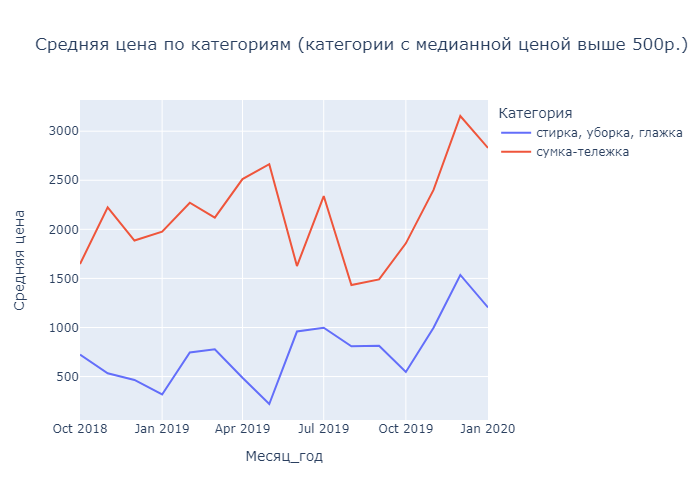

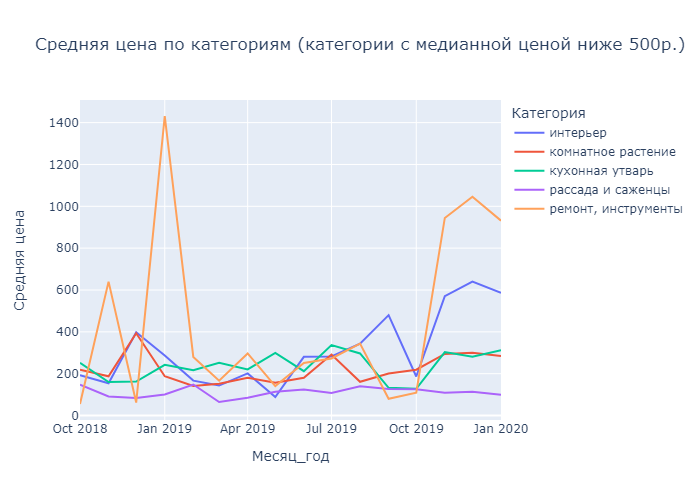

In [67]:
category_month_total['Средняя цена'] = (category_month_total['Выручка руб.']
                                        / category_month_total['Продажи в штуках'])

category_price_500 = category_month_total.query('Категория == ["сумка-тележка", "стирка, уборка, глажка"]')

category_price_250 = category_month_total.query('Категория == ["кухонная утварь",\
                    "интерьер", "ремонт, инструменты", "комнатное растение", "рассада и саженцы"]')

fig_category_price_500 = px.line(category_price_500, x='Месяц_год', y='Средняя цена',
                                 color='Категория',
                                 title='Средняя цена по категориям (категории с медианной ценой выше 500р.)')
fig_category_price_500.show('png')

fig_category_price_250 = px.line(category_price_250, x='Месяц_год', y='Средняя цена',
                                 color='Категория',
                                 title='Средняя цена по категориям (категории с медианной ценой ниже 500р.)')
fig_category_price_250.show('png')

In [68]:
# проверяем, что рост средней цены янв 2019 в категории 'ремонт' не связан с аномальным поставщиком/заказом
(data.query('category == "ремонт, инструменты" & month == 1 & year == 2019')\
            [['day', 'customer_id', 'product_update', 'quantity', 'total_value']])

,day,customer_id,product_update,quantity,total_value
1428,2019-01-02,68a51840-32e5-4990-bf27-e5bf2f0afc91,стремянка бытовая framar slimmy 4 ступени,1,1874.0
1440,2019-01-05,ca032543-8163-4497-a877-1a12aca3c121,стремянка framar major tech 4 алюминиевая 4 х ...,1,4499.0
1452,2019-01-07,6a66aff9-2c2f-4051-a789-84e05f722823,бензин для зажигалок 1205214,2,134.0
1453,2019-01-07,95d6ad00-1c3a-492d-82d7-40a482334a6e,стремянка eurogold colour 2х ступенчатая с про...,1,1199.0
1534,2019-01-17,2ec87304-4a2e-49fb-9208-764e69c0a18d,стремянка табурет алюминиевая hailo l90 step k...,1,2699.0
1642,2019-01-30,b27cb3a0-256a-4c99-acfd-1b68361490f4,лестница стремянка зми конёк медный антик тс 277,1,974.0
1646,2019-01-31,c971fb21-d54c-4134-938f-16b62ee86d3b,петля рояльная цинк 960 мм 1103055,1,74.0


<div style="border:solid green 2px; padding: 20px">

* Средняя цена всех категорий 529р., медианная цена 150р.

* Самая высокая средняя цена в категории 'сумка-тележка' 2060р. (медианная цена данной категории 1087р.).

* Самая низкая средняя цена в категории 'рассада и саженцы' 103р. (медианная цена данной категории 97р.).

* Самый дорогой товар находится в категории 'стирка, уборка, глажка' 14917р. Сушилка уличная Leifheit 85210 LINOMATIC V 400.

* Рост средней цены в янв 2019 г. в категории 'ремонт, инструменты' не связан с аномальным заказом, в этом месяце продали много дорогих товаров в категории 'стремянка'.

* В конце 2019 г. выросла средняя цена у практически у всех категорий.

</div>

### TOP товары по категориям

<div style="border:solid black 2px; padding: 20px">

Посмотрим на топовые позиций в разрезе категорий.

Slowmovers смотреть не будем, так как у нас недостаточно данных, что оценить действительно ли это слабая позиция или просто единичные остатки прошлых сезонов.

</div>

<div style="border:solid blue 2px; padding: 20px">
    
Ниже 2 таблицы:
* Top-5 по выручке (все товары)
* Top-5 по продажам в штуках (все товары)

</div>

In [69]:
data_top_product = data.pivot_table(index=['category', 'product_update'],
                                    values=['total_value', 'quantity'], aggfunc='sum')\
                       .reset_index()\
                       .rename(columns= {'total_value':'Выручка руб.','category':'Категория',
                                         'quantity':'Продажи в штуках', 'product_update':'Название товара'})
data_top_product['Средняя цена'] = round(data_top_product['Выручка руб.']
                                         / data_top_product['Продажи в штуках'], 0)

display(data_top_product.sort_values('Выручка руб.',ascending=False).head())
display(data_top_product.sort_values('Продажи в штуках',ascending=False).head()) 

,Категория,Название товара,Продажи в штуках,Выручка руб.,Средняя цена
2215,сумка-тележка,сумка тележка 2 х колесная gimi argo синяя,46,49356.0,1073.0
315,интерьер,муляж яблоко 9 см красное,618,32702.0,53.0
2245,сумка-тележка,сумка тележка хозяйственная andersen scala sho...,5,28045.0,5609.0
1986,"стирка, уборка, глажка",сушилка meliconi stendy junior,5,27970.0,5594.0
1921,"стирка, уборка, глажка",мусорный контейнер hailo bigbin swing 45 0845 ...,5,27560.0,5512.0


,Категория,Название товара,Продажи в штуках,Выручка руб.,Средняя цена
315,интерьер,муляж яблоко 9 см красное,618,32702.0,53.0
1766,"ремонт, инструменты",ручка скоба рс 100 белая трибатрон 1108035,201,5829.0,29.0
317,интерьер,муляж яблоко зеленый 9 см полиуретан,188,10492.0,56.0
1731,"ремонт, инструменты",крепеж для пружины дверной 1107055,170,3290.0,19.0
349,интерьер,плечики пластмассовые размер 52 54 тула 1205158,160,3210.0,20.0


<div style="border:solid blue 2px; padding: 20px">
    
Top-3 по выручке в каждой категории.

Ссылки взяты по первым строкам в выдаче запроса по наименованию товара.

</div>

In [70]:
top_3 = data_top_product.sort_values(['Категория', 'Выручка руб.'],ascending=False).groupby('Категория')\
                        .head(3)

top_3['Ссылка']  = ['https://market.yandex.ru/product--sumka-telezhka-khoziaistvennaia-gimi-argo-krasnaia-30-kg/1738666294?sku=101665539894&clid=703',
                    'https://market.yandex.ru/product--sumka-telezhka-gimi-argo/396976075?sku=100590975866&wprid=1721933230505272-15134078012841096371-balancer-l7leveler-kubr-yp-sas-138-BAL&utm_source_service=web&clid=703&src_pof=703&icookie=oxEBvbrO%2F6DrYOHRdgQuSd%2BRJcyHJwGpWWjBea26fZJN7sHhf%2FEFUgIir5lSUF1Grkuk4u0oYBfuW9Lt2DuT6nGAl34%3D&baobab_event_id=lz1mlaams4',
                    'https://posuda40.ru/catalog/model/22869/sumka-telezhka-rolser-bora-joy-1800-2-kolesa-krasnaya-bab010rojo/',
                    'https://market.yandex.ru/product--gladilnaia-doska-nika-grant-ng-122kh40-sm/1753279582?sku=101745057898&uniqueId=847794&wprid=1721933555361067-6268402490781829604-balancer-l7leveler-kubr-yp-sas-92-BAL&utm_source_service=web&clid=703&src_pof=703&icookie=oxEBvbrO%2F6DrYOHRdgQuSd%2BRJcyHJwGpWWjBea26fZJN7sHhf%2FEFUgIir5lSUF1Grkuk4u0oYBfuW9Lt2DuT6nGAl34%3D&baobab_event_id=lz1ms81vwv',
                    'https://market.yandex.ru/product--sushilka-dlia-belia-meliconi-napolnaia-stendy-junior/159404140?wprid=1721933603082450-6611452618222189566-balancer-l7leveler-kubr-yp-sas-190-BAL&utm_source_service=web&clid=703&src_pof=703&icookie=oxEBvbrO%2F6DrYOHRdgQuSd%2BRJcyHJwGpWWjBea26fZJN7sHhf%2FEFUgIir5lSUF1Grkuk4u0oYBfuW9Lt2DuT6nGAl34%3D&baobab_event_id=lz1mt9pqng',                      
                    'https://hozotdel.ru/product/musornij-kontejner-45-litrov-hailo-bigbin-swing-45-0845-010/',
                    'https://market.yandex.ru/product--leonardo-2/1774859853?sku=101840540749&uniqueId=780939&clid=703',
                    'https://market.yandex.ru/product--stremianka-scab-rudiano-balzo-3885-5-stupenei-aliuminievaia-stalnoi/890978829?wprid=1721933739986201-16835101488974642918-balancer-l7leveler-kubr-yp-sas-59-BAL&utm_source_service=web&clid=703&src_pof=703&icookie=oxEBvbrO%2F6DrYOHRdgQuSd%2BRJcyHJwGpWWjBea26fZJN7sHhf%2FEFUgIir5lSUF1Grkuk4u0oYBfuW9Lt2DuT6nGAl34%3D&baobab_event_id=lz1mw53i1g',
                    'https://www.stremianki.ru/product/stremjanka-framar-slimmy-4-sinjaja/',
                    'https://www.1d.ru/catalog/rassada_i_sazhentsy/rassada_odnoletnikh_tsvetov/173748/',
                    'https://www.1d.ru/catalog/rassada_i_sazhentsy/rassada_ovoshchey/173965/',
                    'https://www.1d.ru/catalog/rassada_i_sazhentsy/rassada_ovoshchey/173964/',
                    'https://market.yandex.ru/product--chef-akf522/202992019?clid=703',
                    'https://www.1d.ru/catalog/tekstil/kukhonnyy_tekstil/individualnye_salfetki/169103/',
                    'https://avshop.ru/catalog/328327/',
                    'https://cashpo-design.ru/products/spatifillum-svit-lauretta-21-95-gl',
                    'https://ok-plants.ru/product/evkalipt-gunni-piramida',
                    'https://www.rus-dacha.ru/categories/80/items/1861/',
                    'https://www.1d.ru/catalog/tekstil/postelnoe_bele/prostyni/vafelnye/172639/',
                    'https://market.yandex.ru/product--ar1352-iabloko-krasnoe-9sm/855147085?uniqueId=887021&sku=101204895738&wprid=1721934365709382-159299782912529415-balancer-l7leveler-kubr-yp-klg-114-BAL&utm_source_service=web&clid=703&src_pof=703&icookie=oxEBvbrO%2F6DrYOHRdgQuSd%2BRJcyHJwGpWWjBea26fZJN7sHhf%2FEFUgIir5lSUF1Grkuk4u0oYBfuW9Lt2DuT6nGAl34%3D&baobab_event_id=lz1n9i1twu',
                    'https://www.1d.ru/catalog/tekstil/odeyalo/odeyala_iz_sinteticheskikh_napoliteley/166607/']

def format_color_groups(top_3):
    colors = ['bisque', 'lightblue']
    x = top_3.copy()
    factors = list(x['Категория'].unique())
    i = 0
    for factor in factors:
        style = f'background-color: {colors[i]}'
        x.loc[x['Категория'] == factor, :] = style
        i = not i
    return x

def make_clickable(val):
    return f'<a target="_blank" href="{val}">{val}</a>'

top_3.astype('object').style.format({'Ссылка': make_clickable,
                                     'Выручка руб.':'{:.0f}', 'Средняя цена':'{:.0f}'})\
     .set_properties(**{'text-align': 'left'})\
     .apply(format_color_groups, axis=None)

,Категория,Название товара,Продажи в штуках,Выручка руб.,Средняя цена,Ссылка
2215,сумка-тележка,сумка тележка 2 х колесная gimi argo синяя,46,49356,1073,https://market.yandex.ru/product--sumka-telezhka-khoziaistvennaia-gimi-argo-krasnaia-30-kg/1738666294?sku=101665539894&clid=703
2245,сумка-тележка,сумка тележка хозяйственная andersen scala shopper plus lini синяя 133 108 90,5,28045,5609,https://market.yandex.ru/product--sumka-telezhka-gimi-argo/396976075?sku=100590975866&wprid=1721933230505272-15134078012841096371-balancer-l7leveler-kubr-yp-sas-138-BAL&utm_source_service=web&clid=703&src_pof=703&icookie=oxEBvbrO%2F6DrYOHRdgQuSd%2BRJcyHJwGpWWjBea26fZJN7sHhf%2FEFUgIir5lSUF1Grkuk4u0oYBfuW9Lt2DuT6nGAl34%3D&baobab_event_id=lz1mlaams4
2269,сумка-тележка,сумка тележка хозяйственная rolser imx006 bassi logic tour бордовая,3,23037,7679,https://posuda40.ru/catalog/model/22869/sumka-telezhka-rolser-bora-joy-1800-2-kolesa-krasnaya-bab010rojo/
1986,"стирка, уборка, глажка",сушилка meliconi stendy junior,5,27970,5594,https://market.yandex.ru/product--gladilnaia-doska-nika-grant-ng-122kh40-sm/1753279582?sku=101745057898&uniqueId=847794&wprid=1721933555361067-6268402490781829604-balancer-l7leveler-kubr-yp-sas-92-BAL&utm_source_service=web&clid=703&src_pof=703&icookie=oxEBvbrO%2F6DrYOHRdgQuSd%2BRJcyHJwGpWWjBea26fZJN7sHhf%2FEFUgIir5lSUF1Grkuk4u0oYBfuW9Lt2DuT6nGAl34%3D&baobab_event_id=lz1ms81vwv
1921,"стирка, уборка, глажка",мусорный контейнер hailo bigbin swing 45 0845 010 45 л хром,5,27560,5512,https://market.yandex.ru/product--sushilka-dlia-belia-meliconi-napolnaia-stendy-junior/159404140?wprid=1721933603082450-6611452618222189566-balancer-l7leveler-kubr-yp-sas-190-BAL&utm_source_service=web&clid=703&src_pof=703&icookie=oxEBvbrO%2F6DrYOHRdgQuSd%2BRJcyHJwGpWWjBea26fZJN7sHhf%2FEFUgIir5lSUF1Grkuk4u0oYBfuW9Lt2DuT6nGAl34%3D&baobab_event_id=lz1mt9pqng
2143,"стирка, уборка, глажка",урна уличная гео hobbyka хоббика 59 37 5см сталь,5,24370,4874,https://hozotdel.ru/product/musornij-kontejner-45-litrov-hailo-bigbin-swing-45-0845-010/
1793,"ремонт, инструменты",стремянки colombo leonardo 2 ступени g300a02w серая 3646,3,8997,2999,https://market.yandex.ru/product--leonardo-2/1774859853?sku=101840540749&uniqueId=780939&clid=703
1772,"ремонт, инструменты",стремянка 7 ступенчатая hailo 8040 707 xxl 13 см алюминиевая с лотком для инструментов,1,7724,7724,https://market.yandex.ru/product--stremianka-scab-rudiano-balzo-3885-5-stupenei-aliuminievaia-stalnoi/890978829?wprid=1721933739986201-16835101488974642918-balancer-l7leveler-kubr-yp-sas-59-BAL&utm_source_service=web&clid=703&src_pof=703&icookie=oxEBvbrO%2F6DrYOHRdgQuSd%2BRJcyHJwGpWWjBea26fZJN7sHhf%2FEFUgIir5lSUF1Grkuk4u0oYBfuW9Lt2DuT6nGAl34%3D&baobab_event_id=lz1mw53i1g
1792,"ремонт, инструменты",стремянки colombo leonardo 2 ступени g300a02w белая 4096,2,7424,3712,https://www.stremianki.ru/product/stremjanka-framar-slimmy-4-sinjaja/
1278,рассада и саженцы,однолетнее растение петуния махровая в кассете 4 шт россия,78,6412,82,https://www.1d.ru/catalog/rassada_i_sazhentsy/rassada_odnoletnikh_tsvetov/173748/


<div style="border:solid green 2px; padding: 20px">

**Top-5 по выручке.**

* Товар муляж яблоко 9 см красное 53р. попал в top-5 и по выручке и по продажам в штуках.
* 2 позиции категории 'сумка-тележка' 
* 2 позиции категории 'стирка, уборка, глажка' с высокой ценой товара.

**Top-5 по продажам в штуках.**
* 2 позиции муляж яблоко 9 см в разных цветах со средней ценой 55р.
* 2 позиции товары для ремонта
* 1 позиция вешалки

**Top-3 по выручке в категории.**

* 'стирка, уборка, глажка'.
    * сушилка meliconi stendy junior 5594р.
    * мусорный контейнер hailo bigbin swing 45 0845 010 45 л хром 5512р.
    * урна уличная гео hobbyka хоббика 59 37 5см сталь 4874р.

* 'ремонт, инструменты'. Все позиции из списка - это 'стремянка'.
  
* 'рассада и саженцы'. В топе рассада цветов.
  
* 'кухонная утварь'. Салфетка 30х43, модульная стеклянная банка, термокружка
    
* 'интерьер'.
    * муляж яблоко 9 см красное 53р.
    * одеяло wellness t142 белое темостеганое 140х205 см 1568р.
    * коврик придверный attribute nature кокосовый 60x40 см 313р.

</div>

### Частота заказов по времени суток

<div style="border:solid black 2px; padding: 20px">

Проанализируем частоту заказов по времени суток.

</div>

In [71]:
data_hour = data.pivot_table(index='hour', values=['order_id', 'total_value'],
                        aggfunc={'order_id':'nunique',  'total_value':'sum'})\
                .reset_index()\
                .rename(columns={'total_value':'Выручка руб.','hour':'Время заказа','order_id':'Количество заказов'})
data_hour

,Время заказа,Количество заказов,Выручка руб.
0,0,56,42626.50
1,1,30,24918.00
2,2,23,27440.00
3,3,10,11056.00
4,4,19,14983.33
5,5,21,19760.50
6,6,33,50931.00
7,7,72,98894.00
8,8,145,163708.50
9,9,195,228561.00


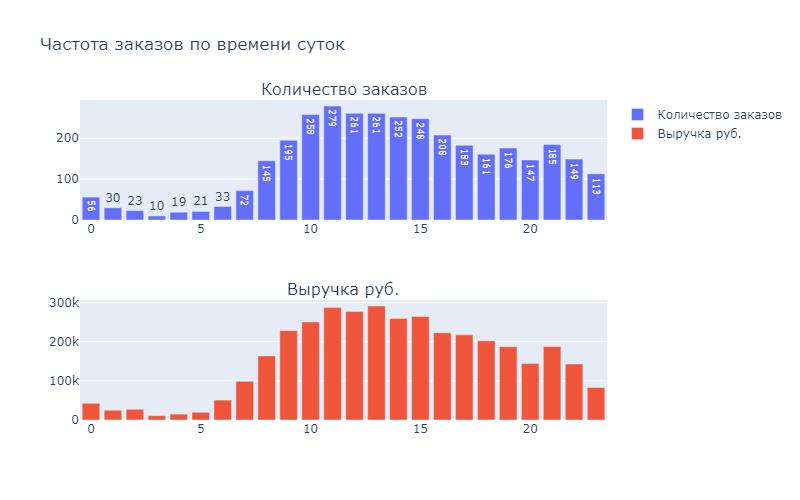

In [72]:
fig_data_hour = make_subplots(rows = 2, cols = 1, subplot_titles=('Количество заказов', 'Выручка руб.'))

fig_data_hour.append_trace(go.Bar(x=data_hour['Время заказа'], y=data_hour['Количество заказов'],
                                 name='Количество заказов', text=data_hour['Количество заказов']), row=1, col=1)
fig_data_hour.append_trace(go.Bar(x=data_hour['Время заказа'], y=data_hour['Выручка руб.'],
                                 name='Выручка руб.'), row=2, col=1)

fig_data_hour.update_layout(height=500,width=800,title='Частота заказов по времени суток')
fig_data_hour.show('png')

<div style="border:solid green 2px; padding: 20px">

Чаще всего покупатели делают заказы 9:00 до 16:00.

Самое популярное время оформления заказа: 11:00.

</div>

### Частота заказов и средний чек по дням недели

<div style="border:solid black 2px; padding: 20px">

Проанализируем частоту заказов и средний чек по дням недели.

</div>

In [73]:
data_weekday = data.pivot_table(index='weekday', values=['order_id', 'total_value'],
                                aggfunc={'order_id':'nunique', 'total_value':'sum'})\
                    .reset_index()\
                    .rename(columns = {'total_value': 'Выручка руб.', 'weekday': 'Номер дня недели',
                                             'order_id': 'Количество заказов'})
data_weekday['День недели'] = ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']
data_weekday['Средний чек'] = (data_weekday['Выручка руб.'] / data_weekday['Количество заказов']).round()
data_weekday[['День недели', 'Выручка руб.', 'Количество заказов', 'Средний чек']]

,День недели,Выручка руб.,Количество заказов,Средний чек
0,пн,628597.67,572,1099.0
1,вт,633105.50,583,1086.0
2,ср,559707.16,528,1060.0
3,чт,584643.83,544,1075.0
4,пт,540193.75,452,1195.0
5,сб,319986.00,346,925.0
6,вс,433140.50,455,952.0


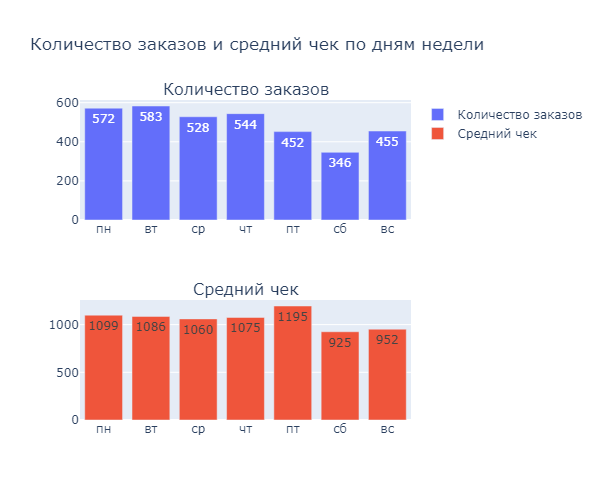

In [74]:
fig_data_weekday = make_subplots(rows = 2, cols = 1, subplot_titles=('Количество заказов','Средний чек'))

fig_data_weekday.append_trace(go.Bar(x=data_weekday['День недели'], y=data_weekday['Количество заказов'],
                                     name='Количество заказов', text=data_weekday['Количество заказов']), row=1, col=1)
fig_data_weekday.append_trace(go.Bar(x=data_weekday['День недели'], y=data_weekday['Средний чек'],
                                      name='Средний чек', text=data_weekday['Средний чек']), row=2, col=1)

fig_data_weekday.update_layout(height=500,width=600,title='Количество заказов и средний чек по дням недели')
fig_data_weekday.show('png')

<div style="border:solid green 2px; padding: 20px">

Чаще всего покупатели делают заказы в будний день.

Так как ассортимент магазина ориентирован на "дачников", можно предположить, что в будний день делают заказы, а в выходные едут за город.

Средний чек в будние дни выше среднего чека в выходные.

</div>

### Сравнение буднего и выходного дня

<div style="border:solid black 2px; padding: 20px">

Сравним значения основных показателей в будний день и выходной день.

</div>

In [75]:
data_weekend = (data.pivot_table(index='weekday_weekend', values=['total_value', 'quantity', 'order_id'],
                                aggfunc={'total_value': 'sum', 'quantity': 'sum', 'order_id': 'nunique'}))

data_weekend.loc['будний день'] = round(data_weekend.loc['будний'] / 5, 0)
data_weekend.loc['выходной день'] = round(data_weekend.loc['выходной'] / 2, 0)

data_weekend['avg_price'] = round(data_weekend['total_value'] / data_weekend['quantity'], 0)
data_weekend['avg_check'] = round(data_weekend['total_value'] / data_weekend['order_id'], 0)
data_weekend['UPT'] = round(data_weekend['quantity'] / data_weekend['order_id'], 2)
data_weekend.loc['разница выходного к буднему (%)'] = (data_weekend.loc['выходной день']
                                                       / data_weekend.loc['будний день'] - 1) * 100

data_weekend = data_weekend.reset_index()
data_weekend.columns = ['Будний-Выходной', 'Среднее количество заказов','Средние продажи в штуках',
                        'Средняя выручка', 'Средняя цена', 'Средний чек', 'UPT']

data_weekend1 = data_weekend[data_weekend['Будний-Выходной']\
               .isin(['будний день', 'выходной день', 'разница выходного к буднему (%)'])]

data_weekend1.style.format({'UPT':'{:.2f}', 'Средний чек':'{:.0f}', 'Средняя цена':'{:.0f}',
                            'Средние продажи в штуках':'{:.0f}',
                           'Средняя выручка':'{:.0f}', 'Среднее количество заказов':'{:.0f}'})

,Будний-Выходной,Среднее количество заказов,Средние продажи в штуках,Средняя выручка,Средняя цена,Средний чек,UPT
2,будний день,536,2063,589250,286,1099,3.85
3,выходной день,400,1100,376563,342,941,2.75
4,разница выходного к буднему (%),-25,-47,-36,20,-14,-28.57


In [76]:
data_weekend2 = data_weekend[data_weekend['Будний-Выходной'].isin(['будний день', 'выходной день'])]

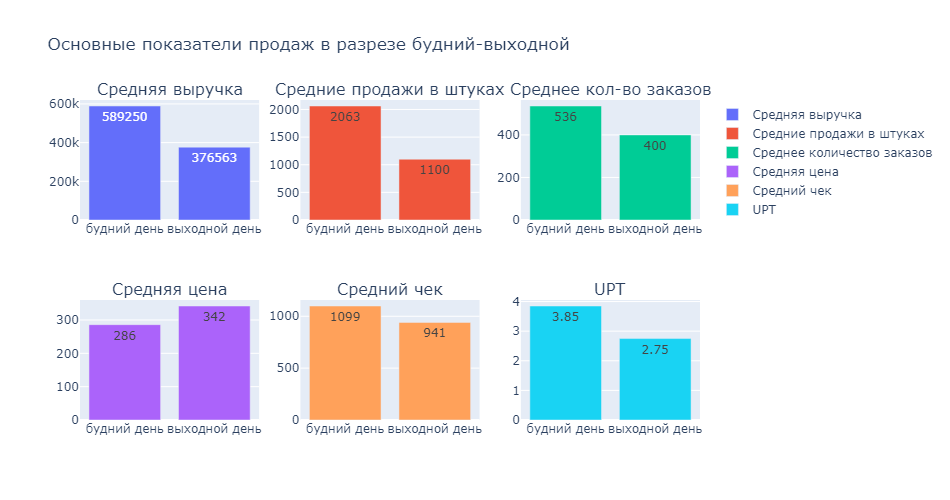

In [77]:
data_weekend2 = data_weekend[data_weekend['Будний-Выходной'].isin(['будний день', 'выходной день'])]

# визуализирем основные параметры в разрезе будний/выходной

fig_weekend = make_subplots(rows = 2, cols = 3,
             subplot_titles=('Средняя выручка','Средние продажи в штуках',
                             'Среднее кол-во заказов', 'Средняя цена', 'Средний чек', 'UPT'))

fig_weekend.append_trace(go.Bar(x=data_weekend2['Будний-Выходной'], y=data_weekend2['Средняя выручка'],
                                     name='Средняя выручка', text=data_weekend2['Средняя выручка']), row=1, col=1)

fig_weekend.append_trace(go.Bar(x=data_weekend2['Будний-Выходной'], y=data_weekend2['Средние продажи в штуках'],
                                     name='Средние продажи в штуках', text=data_weekend2['Средние продажи в штуках']),
                                     row=1, col=2)

fig_weekend.append_trace(go.Bar(x=data_weekend2['Будний-Выходной'], y=data_weekend2['Среднее количество заказов'],
                                     name='Среднее количество заказов', text=data_weekend2['Среднее количество заказов']),
                                     row=1, col=3)

fig_weekend.append_trace(go.Bar(x=data_weekend2['Будний-Выходной'], y=data_weekend2['Средняя цена'],
                                     name='Средняя цена', text=data_weekend2['Средняя цена']), row=2, col=1)

fig_weekend.append_trace(go.Bar(x=data_weekend2['Будний-Выходной'], y=data_weekend2['Средний чек'],
                                     name='Средний чек', text=data_weekend2['Средний чек']), row=2, col=2)

fig_weekend.append_trace(go.Bar(x=data_weekend2['Будний-Выходной'], y=data_weekend2['UPT'],
                                     name='UPT', text=data_weekend2['UPT']), row=2, col=3)

fig_weekend.update_layout(height=500,width=950,title='Основные показатели продаж в разрезе будний-выходной')
fig_weekend.show('png')

<div style="border:solid green 2px; padding: 20px">

Все показатели по продажам выше в будний день (выручка, продажи в штуках, количество заказов, средний чек, UPT).

Кроме показателя средняя цена; средняя цена товара выше в выходной день.

</div>

### Частота заказов по времени в разрезе дней недели

<div style="border:solid black 2px; padding: 20px">

Проанализируем частоту заказов по времени в разрезе дней недели.
Возьмем время с 8:00 до 22:00.

</div>

In [78]:
data_weekday_hour = data.query('hour == [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]')\
                        .pivot_table(index=['weekday', 'hour'], values='order_id', aggfunc='nunique')\
                        .reset_index()

data_weekday_hour.columns = ['День недели', 'Время', 'Количество заказов']
data_weekday_hour['Количество заказов в неделю'] = data_weekday_hour\
                                                  .groupby('День недели')['Количество заказов'].transform('sum')
data_weekday_hour['% количества заказов'] = round(data_weekday_hour['Количество заказов']
                                                  / data_weekday_hour['Количество заказов в неделю'] * 100, 2)

data_weekday_hour1 = data_weekday_hour.pivot_table(index='Время',columns='День недели',
                                                   values='% количества заказов', aggfunc='mean')\
                                      .reset_index()
data_weekday_hour1.style.format("{:.2f}").background_gradient(cmap='Blues', axis=0)\
                  .set_caption('Частота заказов по времени в разрезе дней недели')

День недели,Время,1,2,3,4,5,6,7
0,8.00,4.47,5.50,4.82,5.69,5.21,3.38,2.88
1,9.00,6.99,6.48,5.24,8.63,7.03,3.72,4.56
2,10.00,7.18,9.43,9.01,9.80,9.64,6.08,6.00
3,11.00,11.07,10.02,8.60,9.80,9.38,6.08,6.24
4,12.00,9.13,9.43,7.55,8.24,9.64,6.76,7.43
5,13.00,10.10,6.68,11.32,7.45,9.38,7.77,5.76
6,14.00,8.74,7.47,9.43,8.63,9.38,5.41,6.71
7,15.00,7.77,8.06,10.06,7.45,6.25,6.76,8.87
8,16.00,7.18,5.50,5.87,6.27,3.91,11.82,7.91
9,17.00,6.02,5.11,5.03,4.90,4.69,7.09,9.11


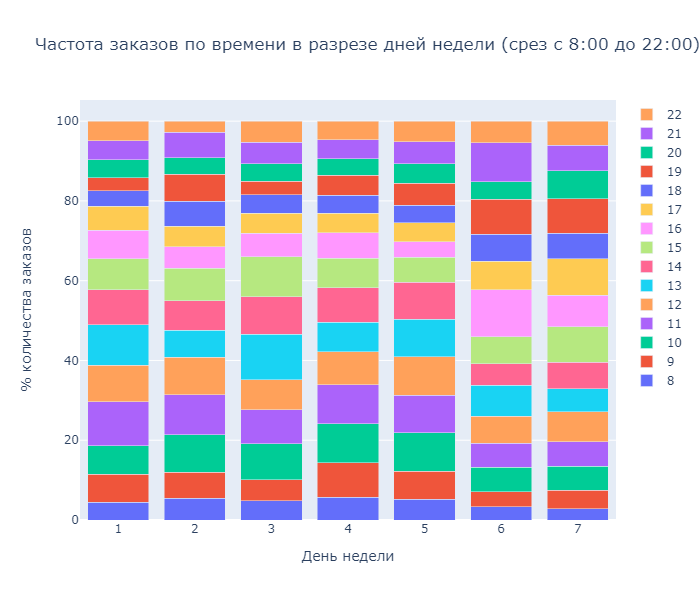

In [79]:
fig_weekday_hour = go.Figure()
for category in data_weekday_hour1['Время'].values:
    fig_weekday_hour.add_trace(go.Bar(
            x=data_weekday_hour1.columns[1:],
            y=list(data_weekday_hour1.loc[data_weekday_hour1['Время']==category]\
                   [list(data_weekday_hour1.columns[1:])].transpose().iloc[:,0]),
            name=str(category)))
    
fig_weekday_hour.update_layout(barmode='stack', height=600, width=700,
                              title='Частота заказов по времени в разрезе дней недели (срез с 8:00 до 22:00)',
                              xaxis_title='День недели', yaxis_title='% количества заказов')
fig_weekday_hour.show('png')

<div style="border:solid green 2px; padding: 20px">

В будний день чаще покупают в первой половине дня до 15:00.

В выходные дни больше заказов во второй половине дня после 15:00.

</div>

### Вывод по исследовательскому анализу

<div style="border:solid blue 2px; padding: 20px">

**Общие показатели интернет-магазина.**

Выручка руб. 3.7М руб.

Средняя цена товара 296 р., но за счет количества штук в заказе средний чек 1063р. UPT: 3.6.

**Динамика основных показателей по месяцам.**


Продажи 2019 г. значительно упали относительно продаж 2020г.

Если сравнить год к году октябрь-январь, то видим, что продажи по выручке и штукам значительно упали. При этом суммарное количество заказов осталось на уровне периода 'до'. Вероятно, из-за роста средней цены стали меньше покупать в штуках в заказе, это видно по UPT.

В 2019 г. самое большое количество штук в заказе в мае, самая высокая выручка в апреле.

Падение продаж в штуках, а также рост средней цены в конце 2019г. может быть связан с началом пандемии.

**Продажи по категориям.**

Top-3 категории по выручке (доля 73%):
 * стирка, уборка, глажка 27.8%
 * интерьер 23.8%
 * сумка-тележка 21.4%

У категорий 'стирка, уборка, глажка' и 'сумка-тележка' большая доля продаж в деньгах и значительно меньше доля продаж в штуках. Соответственно, в данных категориях высокая средняя цена товара.

В этой связи обратим внимание на категорию 'рассада и саженцы', где большая доля по продажам в штуках, но маленькая доля по выручке. Дешевый товар, который закупается в больших количествах в сезон.

**Динамика продаж по категориям по месяцам.**

* У категорий 'рассада и саженцы' пик продаж в апреле-мае. Увеличение продаж рассады в мае не привело к соразмерному увеличению продаж других категорий, т.е. к увеличению продаж сопутствующего товара.

* Интересны небольшие всплески продаж сентябре-октябре у ряда категорий, похоже на закрытие дачного сезона (уборка, ремонт).

* У категории 'комнатное растение' пик продаж в марте, вероятно покупают данный товар как подарок на 8 марта.

* В категории 'стирка, уборка, глажка' 2 пика продаж по выручке: февраль и июль.

**Средняя цена по категориям.**

* Средняя цена всех категорий 529р., медианная цена 150р.

* Самая высокая средняя цена в категории 'сумка-тележка' 2060р. (медианная цена данной категории 1087р.).

* Самая низкая средняя цена в категории 'рассада и саженцы' 103р. (медианная цена данной категории 97р.).

* Самый дорогой товар находится в категории 'стирка, уборка, глажка' 14917р. Сушилка уличная Leifheit 85210 LINOMATIC V 400.

* Рост средней цены в янв 2019 г. в категории 'ремонт, инструменты' не связан с аномальным заказом, в этом месяце продали много дорогих товаров в категории 'стремянка'.

* В конце 2019 г. выросла средняя цена у практически у всех категорий.

**TOP товары по категориям.**

*Top-5 по выручке.*

* Товар муляж яблоко 9 см красное 53р. попал в top-5 и по выручке и по продажам в штуках.
* 2 позиции категории 'сумка-тележка' 
* 2 позиции категории 'стирка, уборка, глажка' с высокой ценой товара.

*Top-5 по продажам в штуках.*
* 2 позиции муляж яблоко 9 см в разных цветах со средней ценой 55р.
* 2 позиции товары для ремонта
* 1 позиция вешалки

*Top-3 по выручке в категории.*

* 'стирка, уборка, глажка'.
    * сушилка meliconi stendy junior 5594р.
    * мусорный контейнер hailo bigbin swing 45 0845 010 45 л хром 5512р.
    * урна уличная гео hobbyka хоббика 59 37 5см сталь 4874р.

* 'ремонт, инструменты'. Все позиции из списка - это 'стремянка'.
  
* 'рассада и саженцы'. В топе рассада цветов.
  
* 'кухонная утварь'. Салфетка 30х43, модульная стеклянная банка, термокружка
    
* 'интерьер'.
    * муляж яблоко 9 см красное 53р.
    * одеяло wellness t142 белое темостеганое 140х205 см 1568р.
    * коврик придверный attribute nature кокосовый 60x40 см 313р.
 
**Частота заказов по времени суток.**

Чаще всего покупатели делают заказы 9:00 до 16:00.

Самое популярное время оформления заказа: 11:00.

**Частота заказов по времени в разрезе дней недели.**

Чаще всего покупатели делают заказы в будний день.

Так как ассортимент магазина ориентирован на "дачников", можно предположить, что в будний день делают заказы, а в выходные едут за город.

В будний день чаще покупают в первой половине дня до 15:00.

В выходные дни больше заказов во второй половине дня после 15:00. 

**Сравнение буднего и выходного дня.**

Все показатели по продажам выше в будний день (выручка, продажи в штуках, количество заказов, средний чек, UPT).

Кроме показателя средняя цена; средняя цена товара выше в выходной день.


</div>

[Начало_проекта](#Начало_проекта)

<a id="Сегментация"></a>

## Сегментация покупателей на основе истории покупок

### Создание таблицы RFM

<div style="border:solid black 2px; padding: 20px">

Создадим таблицу RFM.

Для RFM-анализа нам потребуются данные ниже о каждом из покупателей:
* customer_id - идентификатор покупателя;
* recency - количество дней с момента последней покупки;
* frequency - общее количество транзакций;
* value - общая сумма потраченных денег.


</div>

In [80]:
# зададим текущую дату
now_date = dt.datetime(2020,2,1)

In [81]:
# Создание таблицы RFM
RFM_table = data.groupby('customer_id')\
                .agg({'date': lambda x: (now_date - x.max()).days, 
                      'order_id': lambda x: len(x.unique()),
                      'total_value': lambda x: x.sum()})

RFM_table['date'] = RFM_table['date'].astype(int)

RFM_table.rename(columns={'date': 'recency', 
                          'order_id': 'frequency',
                          'total_value': 'value'}, inplace=True)

RFM_table.head()

,recency,frequency,value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0


### Количество заказов на покупателя

<div style="border:solid black 2px; padding: 20px">

Выведем количество заказов на покупателя.

</div>

In [82]:
rfm_index = RFM_table.reset_index()

In [83]:
data_cnt_orders = rfm_index .groupby('frequency')['customer_id'].count().reset_index()\
                            .rename(columns= {'frequency': 'Частота заказов', 'customer_id': 'Количество покупателей'})
data_cnt_orders['Доля'] = round((data_cnt_orders['Количество покупателей']
                                 / data_cnt_orders['Количество покупателей'].sum()) * 100, 2)
data_cnt_orders

,Частота заказов,Количество покупателей,Доля
0,1,1541,63.57
1,2,856,35.31
2,3,20,0.83
3,4,3,0.12
4,5,1,0.04
5,7,1,0.04
6,17,1,0.04
7,126,1,0.04


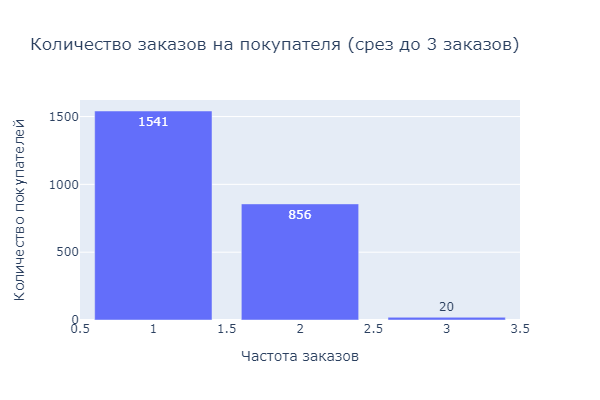

In [84]:
data_cnt_orders_3 = data_cnt_orders[data_cnt_orders['Частота заказов'] < 4]
fig_cnt_orders = px.bar(data_frame=data_cnt_orders_3, x='Частота заказов', y='Количество покупателей',
                        barmode='stack', text='Количество покупателей',
                        title='Количество заказов на покупателя (срез до 3 заказов)')
fig_cnt_orders.update_layout(width=600, height=400)
fig_cnt_orders.show('png')

<div style="border:solid green 2px; padding: 20px">

Доля покупателей, у которых было 1-2 заказа, 98.9%.
* 1 заказ - доля покупателей 63.6%
* 2 заказа - доля покупателей 35.3%

</div>

###  Cумма потраченных покупателем денег

<div style="border:solid black 2px; padding: 20px">

Посмотрим на общую сумму покупок покупателями.

</div>

In [85]:
# основные статистические данные по столбцу 'monetary_value'
rfm_index['value'].describe().round()

count      2424.0
mean       1526.0
std        3821.0
min          15.0
25%         389.0
50%         831.0
75%        1789.0
max      159508.0
Name: value, dtype: float64

In [86]:
print('Перцентили 95, 99', np.percentile(rfm_index['value'], [95, 99]))

Перцентили 95, 99 [4729.95 8724.81]


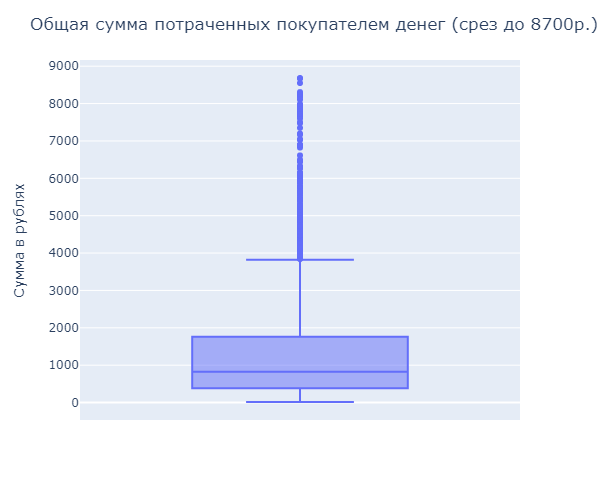

In [87]:
fig_value = px.box(rfm_index[rfm_index['value'] < 8700], y='value')

fig_value.update_layout(width=600, height=500, yaxis_title='Сумма в рублях',
                        title='Общая сумма потраченных покупателем денег (срез до 8700р.)')
fig_value.show('png')

<div style="border:solid green 2px; padding: 20px">

**Cумма потраченных покупателем денег.**

* Среднее значение: 1526р.
* Медианное значение: 831р.

Много выбросов из больших значений. Это те клиенты, которые больше всего принесли выручки.

</div>

### Количество дней с момента последней покупки

<div style="border:solid black 2px; padding: 20px">

Посмотрим на количество дней с момента последней покупки.

</div>

In [88]:
# основные статистические данные по столбцу 'recency'
rfm_index['recency'].describe().round()

count    2424.0
mean      216.0
std       149.0
min         0.0
25%        73.0
50%       208.0
75%       343.0
max       488.0
Name: recency, dtype: float64

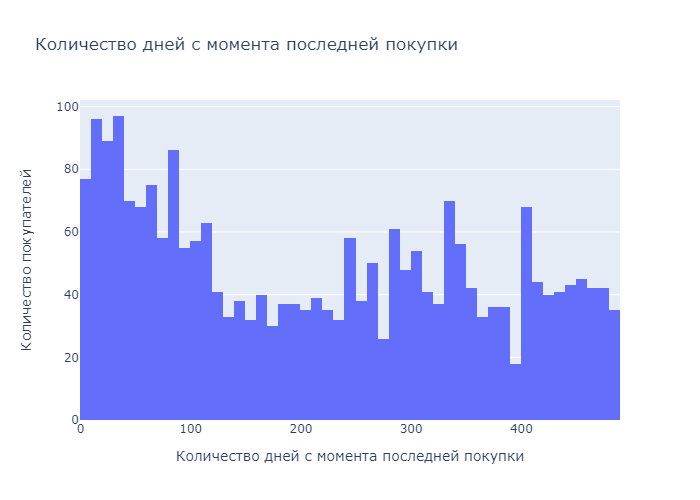

In [89]:
fig_recency = px.histogram(rfm_index, x='recency',
                           nbins=50, title='Количество дней с момента последней покупки')
fig_recency.update_layout(yaxis_title='Количество покупателей',
                          xaxis_title='Количество дней с момента последней покупки')
fig_recency.show('png')

<div style="border:solid green 2px; padding: 20px">

**Количество дней с момента последней покупки.**

Больше покупателей сосредоточено в диапазоне от 0 до 120 дней с момента последней покупки.

По графику видно, что покупатели распределены по всему периоду имеющихся данных в большом количестве.


</div>

### Показатели RFM

<div style="border:solid black 2px; padding: 20px">

Проанализируем показатели RFM.

Для расчета будем использовать квантили. Внутри каждого параметра покупатели будут разбиты на 4 класса.

</div>

In [90]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,value
0.25,73.0,1.0,389.0000
0.50,208.0,1.0,831.0000
0.75,343.0,2.0,1788.9975


In [91]:
# Преобразование квантилей в словарь
quantiles = quantiles.to_dict()
##  Сегментация RFM
RFM_Segment = RFM_table.copy()
# Аргументы
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Аргументы
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
        
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles))
RFM_Segment['M_Quartile'] = RFM_Segment['value'].apply(FM_Class, args=('value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [92]:
RFM_Segment_2 = RFM_Segment
RFM_Segment_2.reset_index().head()

,customer_id,recency,frequency,value,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,3,1,2,312
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,1,1,2,112
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,3,1,3,313
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,1,1,3,113
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,3,1,4,314


In [93]:
RFM_Segment_2.groupby('RFMClass')['recency'].count()

RFMClass
111    152
112    145
113    142
114    129
131      6
132     10
133      5
134     11
142      1
143      1
144      3
211    160
212    148
213    127
214     97
231     10
232     15
233     12
234     22
242      3
243      4
244      8
311    150
312    109
313     97
314     76
331     25
332     35
333     50
334     55
341      1
342      1
343      1
344      4
411      5
412      1
414      3
431    103
432    133
433    166
434    198
Name: recency, dtype: int64

### Сегментация покупателей

<div style="border:solid black 2px; padding: 20px">

Разделим покупателей на 4 сегмента:

* Лучшие покупатели интернет-магазина
* Покупатели, которые находятся на пороге оттока
* Потерянные покупатели
* Лояльные покупатели

Ниже вывели по 5 покупателей в каждой категории.

</div>

<div style="border:solid black 2px; padding: 20px">

**Лучшие покупатели интернет-магазина.**

У нас не получилось выделить класс покупателей, у которых все три четверки. Поэтому выделим лучших по классам 344 и 434. Сортировка по убыванию выручки с покупателя.

Что можно сделать:
* сделать персональное предложение
* попросить оставить отзыв

</div>

In [94]:
#RFMClass = 344, 434
print('Количество лучших покупателей:', len(RFM_Segment_2.query('RFMClass == ["344", "434"]')))
RFM_Segment_2.query('RFMClass == ["344", "434"]').sort_values('value', ascending=False).head()

Количество лучших покупателей: 202


,recency,frequency,value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,92,17,21361.0,3,4,4,344
f279d50f-a508-40b4-bde5-5cb4a1be3ad0,31,2,16557.0,4,3,4,434
ad66d870-22f5-43bc-958f-73420822586b,68,2,13731.0,4,3,4,434
b7dffbd3-810c-4125-889a-454ee093eb73,8,2,10168.0,4,3,4,434
ac250053-a236-467a-97d2-ddbb9bf4a1ba,50,2,8684.0,4,3,4,434


<div style="border:solid black 2px; padding: 20px">

**Покупатели, которые находятся на пороге оттока.**

Выделим покупателей, которые давно совершали покупку. Сортировка по убыванию выручки с покупателя.

Что можно сделать:
* отправить промокод
* рассказать об акции
* отправить полезные статьи
* предложить пройти небольшой опрос, чтобы выяснить причину, почему ушли

</div>

In [95]:
print('Количество покупателей на пороге оттока:', len(RFM_Segment_2.query('R_Quartile <= 1')))
RFM_Segment_2.query('R_Quartile <= 1').sort_values('value', ascending=False).head()

Количество покупателей на пороге оттока: 605


,recency,frequency,value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
1b2764ad-9151-4051-a46a-9b01b62e6335,451,1,24370.0,1,1,4,114
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,462,1,22056.0,1,1,4,114
909564b8-3a5c-4d3e-8310-5ba1c837bbd7,361,1,16536.0,1,1,4,114
639c4989-b0ab-412a-b7ec-be394cb2d372,452,3,12095.0,1,4,4,144
86c97bf1-c834-423e-9e38-8acda68f97e8,410,2,11548.0,1,3,4,134


<div style="border:solid black 2px; padding: 20px">

**Потерянные покупатели.**

Выделим покупателей с RFMClass 111, т.е. давно совершали покупку, был только 1 заказ на небольшую сумму.

На данных покупателей не стоит тратить много времени. С ними лучше работать, когда решили вопросы с основными сегментами. 

Что можно сделать:
 *  отправить промокод
 *  рассказать об акции

</div>

In [96]:
#RFMClass = 111
print('Количество потерянных покупателей:', len(RFM_Segment_2.query('RFMClass == "111"')))
RFM_Segment_2.query('RFMClass == "111"').sort_values('recency', ascending=False).head()

Количество потерянных покупателей: 152


,recency,frequency,value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
5f75c73a-1305-4079-b040-2bcb42085002,486,1,299.0,1,1,1,111
32a85453-f14d-40c2-90ba-3851498a5f3b,486,1,374.0,1,1,1,111
29a514f5-a27e-4939-85d5-874a0c3f7a2c,486,1,193.0,1,1,1,111
f08d9018-438e-4e96-b519-f74c0302a433,486,1,359.0,1,1,1,111
eee7b1fa-ba81-4049-add6-370ee5e62e72,485,1,187.0,1,1,1,111


<div style="border:solid black 2px; padding: 20px">

Лояльные покупатели.

Покупатели, у которых больше 2 заказов. Сортировка по убыванию выручки с покупателя.

Что можно сделать:
* отправить промокод
* рассказать об акции
* сделать персональную подборку товаров

</div>

In [97]:
print('Количество лояльных покупателей:', len(RFM_Segment_2.query('F_Quartile >= 3')))
RFM_Segment_2.query('F_Quartile >= 3').sort_values('value', ascending=False).head()

Количество лояльных покупателей: 883


,recency,frequency,value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,331,126,159508.0,2,4,4,244
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,287,4,41900.0,2,4,4,244
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,92,17,21361.0,3,4,4,344
940c175f-ea87-44e0-9e16-0a3d0a9abecd,233,2,20232.0,2,3,4,234
f279d50f-a508-40b4-bde5-5cb4a1be3ad0,31,2,16557.0,4,3,4,434


### Вывод по сегментации покупателей

<div style="border:solid blue 2px; padding: 20px">

Создали таблицу RFM.

Для RFM-анализа использовали данные ниже о каждом из покупателей:
* customer_id - идентификатор покупателя;
* recency - количество дней с момента последней покупки;
* frequency - общее количество транзакций;
* monetary_value - общая сумма потраченных денег.

По каждому показателю recency, frequency и monetary_value разделили покупателей на 4 группы по квантилям. Вывели RFMClass покупателя объединив 3 значения групп по квантилям.

**Разделили покупателей на 4 сегмента:**

* Лучшие покупатели интернет-магазина
* Покупатели, которые находятся на пороге оттока
* Потерянные покупатели
* Лояльные покупатели

*Что можно сделать для лучших и лояльных покупателей:*
* сделать персональное предложение
* попросить оставить отзыв
* отправить промокод
* отправить информацию по акции/распродаже

*Что можно сделать для покупателей, которые находятся на пороге оттока:*
* отправить промокод
* рассказать об акции
* отправить полезные статьи
* предложить пройти небольшой опрос, чтобы выяснить причину, почему ушли

*Что можно сделать для потерянных покупателей:*
 *  отправить промокод
 *  рассказать об акции

На потерянных покупателей не стоит тратить много времени. С ними лучше работать, когда решили вопросы с основными сегментами.

**Количество заказов на покупателя.**

Доля покупателей, у которых было 1-2 заказа, 98.9%.
* 1 заказ - доля покупателей 63.6%
* 2 заказа - доля покупателей 35.3%

**Cумма потраченных покупателем денег.**

* Среднее значение: 1526р.
* Медианное значение: 831р.

Много выбросов из больших значений. Это те клиенты, которые больше всего принесли выручки.

**Количество дней с момента последней покупки.**

Больше покупателей сосредоточено в диапазоне от 0 до 120 дней с момента последней покупки.

По графику видно, что покупатели распределены по всему периоду имеющихся данных в большом количестве.

</div>

[Начало_проекта](#Начало_проекта)

<a id="Проверка_гипотез"></a>

## Проверка гипотез

### Гипотеза. Средний чек в будний день выше среднего чека в выходной день

<div style="border:solid black 2px; padding: 20px">

Гипотеза. Средний чек в будний день выше среднего чека в выходной день.

В пункте '3.9. Сравнение буднего и выходного дня' мы выяснили, что средний чек в будний день больше среднего чека выходного дня.

Гипотеза:
* H₀: Средний чек в будний день равен среднему чеку в выходной день.
* H1: Средний чек в будний день больше среднего чека в выходной день.

Применим двухвыборочный t-тест для независимых выборок.

</div>

In [98]:
data_weekend_h = (data.pivot_table(index=['weekday_weekend', 'order_id'], values=['total_value', 'quantity'],
                                   aggfunc={'total_value': 'sum', 'quantity': 'sum'})).reset_index()
data_weekend_h.head()

,weekday_weekend,order_id,quantity,total_value
0,будний,13547,3,684.0
1,будний,14480,3,359.0
2,будний,14481,4,600.0
3,будний,14485,4,676.0
4,будний,14486,10,1880.0


In [99]:
# средний чек будний
sample_1 = data_weekend_h[data_weekend_h['weekday_weekend']=='будний']['total_value']

# средний чек выходной
sample_2 = data_weekend_h[data_weekend_h['weekday_weekend']=='выходной']['total_value']

print(f'Средний чек в будний день: {np.mean(sample_1)}')
print(f'Средний чек в выходной день: {np.mean(sample_2)}')
print('Разница средний чек будний к выходному:',"{0:.3f}".format((np.mean(sample_1)
                                                                  / np.mean(sample_2) - 1) * 100))

alpha = 0.05 # задаем уровень стат. значимости

results = st.ttest_ind(sample_1, sample_2, alternative='greater') # проведем стат. тест 

# выведем на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравним p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний чек в будний день: 1099.7565920119448
Средний чек в выходной день: 940.2328339575531
Разница средний чек будний к выходному: 16.966
p-значение: 0.005664020754351202
Отвергаем нулевую гипотезу


<div style="border:solid green 2px; padding: 20px">

На имеющихся данных, на уровне значимости 5%, есть основания говорить, что средний чек в будние дни выше среднего чека в выходные.

*  p-value = 0.005 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке нет, отвергаем.
* Разница среднего чека буднего дня к среднему чеку выходного дня 17%.

</div>

### Гипотеза. Средний чек в апреле 2019г. равен среднему чеку в мае 2019г.

<div style="border:solid black 2px; padding: 20px">

Гипотеза. Средний чек в апреле 2019г. равен среднему чеку в мае 2019г.

В пункте '3.2 Динамика основных показателей по месяцам' мы выявили, что средний чек в апреле 1186р, в июне 1295р.

Гипотеза:
* H₀: Средний чек в апреле равен среднему чеку в мае.
* H1: Средний чек в апреле отличается от среднего чека в мае.

</div>

In [100]:
data_month_h = (data.query('month == [4, 5]')\
                    .pivot_table(index=['month', 'order_id'], values=['total_value', 'quantity'],
                                        aggfunc={'total_value': 'sum', 'quantity': 'sum'}))\
                    .reset_index()
data_month_h.head()

,month,order_id,quantity,total_value
0,4,14606,9,1215.0
1,4,14608,16,1276.0
2,4,14611,30,1140.0
3,4,14612,19,2723.0
4,4,14614,15,1759.0


In [101]:
sample_4 = data_month_h[data_month_h['month'] == 4]['total_value']
sample_5 = data_month_h[data_month_h['month'] == 5]['total_value']

print(f'Средний чек в апреле: {np.mean(sample_4)}')
print(f'Средний чек в мае: {np.mean(sample_5)}')
print('Разница среднего чека апреля к маю (%):',"{0:.3f}".format((np.mean(sample_4)
                                                                  / np.mean(sample_5) - 1) * 100))

alpha = 0.05

results = st.ttest_ind(sample_4, sample_5)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний чек в апреле: 1186.4943820224719
Средний чек в мае: 1294.5524861878453
Разница среднего чека апреля к маю (%): -8.347
p-значение: 0.5425390564349415
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid green 2px; padding: 20px">

Не получилось отвергнуть нулевую гипотезу.

На имеющихся данных, на уровне значимости 5% (уровне доверия 95%), нет оснований отвергнуть нулевую гипотезу в пользу альтернативы. Есть основания полагать, что средний чек в апреле и в мае не отличается.

</div>

### Вывод по проверке гипотез

<div style="border:solid blue 2px; padding: 20px">

**Гипотеза 1. Средний чек в будний день выше среднего чека в выходной день.**

На имеющихся данных, на уровне значимости 5%, есть основания говорить, что средний чек в будние дни выше среднего чека в выходные. Разница среднего чека буднего дня к среднему чеку выходного дня 20%.

**Гипотеза 2. Средний чек в мае 2019г. равен среднему чеку в июне 2019г.**

На имеющихся данных, на уровне значимости 5%, есть основания полагать, что средний чек в апреле и в мае не отличается.

</div>

[Начало_проекта](#Начало_проекта)

<a id="Презентация"></a>

## Презентация

<div style="border:solid black 2px; padding: 20px">

Презентация: [Исследование интернет-магазина товаров для дома «Пока все ещё тут»](https://disk.yandex.ru/i/biZWBTuRjBHvqg)

</div>

[Начало_проекта](#Начало_проекта)

<a id="Итоги_исследования"></a>

## Итоги исследования

<div style="border:solid blue 2px; padding: 20px">

***  
<span style="color:green;font-weight:700;font-size:15px">***Выводы по исследовательскому анализу данных.***</span>
***

**Общие показатели интернет-магазина.**

Выручка руб. 3.7М руб.

Средняя цена товара 296 р., но за счет количества штук в заказе средний чек 1063р. UPT: 3.6.

**Динамика основных показателей по месяцам.**


Продажи 2019 г. значительно упали относительно продаж 2020г.

Если сравнить год к году октябрь-январь, то видим, что продажи по выручке и штукам значительно упали. При этом суммарное количество заказов осталось на уровне периода 'до'. Вероятно, из-за роста средней цены стали меньше покупать в штуках в заказе, это видно по UPT.

В 2019 г. самое большое количество штук в заказе в мае, самая высокая выручка в апреле.

Падение продаж в штуках, а также рост средней цены в конце 2019г. может быть связан с началом пандемии.

**Продажи по категориям.**

Top-3 категории по выручке (доля 73%):
 * стирка, уборка, глажка 27.8%
 * интерьер 23.8%
 * сумка-тележка 21.4%

У категорий 'стирка, уборка, глажка' и 'сумка-тележка' большая доля продаж в деньгах и значительно меньше доля продаж в штуках. Соответственно, в данных категориях высокая средняя цена товара.

В этой связи обратим внимание на категорию 'рассада и саженцы', где большая доля по продажам в штуках, но маленькая доля по выручке. Дешевый товар, который закупается в больших количествах в сезон.

**Динамика продаж по категориям по месяцам.**

* У категорий 'рассада и саженцы' пик продаж в апреле-мае. Увеличение продаж рассады в мае не привело к соразмерному увеличению продаж других категорий, т.е. к увеличению продаж сопутствующего товара.

* Интересны небольшие всплески продаж сентябре-октябре у ряда категорий, похоже на закрытие дачного сезона (уборка, ремонт).

* У категории 'комнатное растение' пик продаж в марте, вероятно покупают данный товар как подарок на 8 марта.

* В категории 'стирка, уборка, глажка' 2 пика продаж по выручке: февраль и июль.

**Средняя цена по категориям.**

* Средняя цена всех категорий 529р., медианная цена 150р.

* Самая высокая средняя цена в категории 'сумка-тележка' 2060р. (медианная цена данной категории 1087р.).

* Самая низкая средняя цена в категории 'рассада и саженцы' 103р. (медианная цена данной категории 97р.).

* Самый дорогой товар находится в категории 'стирка, уборка, глажка' 14917р. Сушилка уличная Leifheit 85210 LINOMATIC V 400.

* Рост средней цены в янв 2019 г. в категории 'ремонт, инструменты' не связан с аномальным заказом, в этом месяце продали много дорогих товаров в категории 'стремянка'.

* В конце 2019 г. выросла средняя цена у практически у всех категорий.

**TOP товары по категориям.**

*Top-5 по выручке.*

* Товар муляж яблоко 9 см красное 53р. попал в top-5 и по выручке и по продажам в штуках.
* 2 позиции категории 'сумка-тележка' 
* 2 позиции категории 'стирка, уборка, глажка' с высокой ценой товара.

*Top-5 по продажам в штуках.*
* 2 позиции муляж яблоко 9 см в разных цветах со средней ценой 55р.
* 2 позиции товары для ремонта
* 1 позиция вешалки

*Top-3 по выручке в категории.*

* 'стирка, уборка, глажка'.
    * сушилка meliconi stendy junior 5594р.
    * мусорный контейнер hailo bigbin swing 45 0845 010 45 л хром 5512р.
    * урна уличная гео hobbyka хоббика 59 37 5см сталь 4874р.

* 'ремонт, инструменты'. Все позиции из списка - это 'стремянка'.
  
* 'рассада и саженцы'. В топе рассада цветов.
  
* 'кухонная утварь'. Салфетка 30х43, модульная стеклянная банка, термокружка
    
* 'интерьер'.
    * муляж яблоко 9 см красное 53р.
    * одеяло wellness t142 белое темостеганое 140х205 см 1568р.
    * коврик придверный attribute nature кокосовый 60x40 см 313р.
 
**Частота заказов по времени суток.**

Чаще всего покупатели делают заказы 9:00 до 16:00.

Самое популярное время оформления заказа: 11:00.

**Частота заказов по времени в разрезе дней недели.**

Чаще всего покупатели делают заказы в будний день.

Так как ассортимент магазина ориентирован на "дачников", можно предположить, что в будний день делают заказы, а в выходные едут за город.

В будний день чаще покупают в первой половине дня до 15:00.

В выходные дни больше заказов во второй половине дня после 15:00. 

**Сравнение буднего и выходного дня.**

Все показатели по продажам выше в будний день (выручка, продажи в штуках, количество заказов, средний чек, UPT).

Кроме показателя средняя цена; средняя цена товара выше в выходной день.

***  
<span style="color:green;font-weight:700;font-size:15px">***Выводы по сегментации покупателей.***</span>
***

Для RFM-анализа использовали данные ниже о каждом из покупателей:
* customer_id - идентификатор покупателя;
* recency - количество дней с момента последней покупки;
* frequency - общее количество транзакций;
* monetary_value - общая сумма потраченных денег.

По каждому показателю recency, frequency и monetary_value разделили покупателей на 4 группы по квантилям. Вывели RFMClass покупателя объединив 3 значения групп по квантилям.

**Разделили покупателей на 4 сегмента:**

* Лучшие покупатели интернет-магазина
* Покупатели, которые находятся на пороге оттока
* Потерянные покупатели
* Лояльные покупатели

*Что можно сделать для лучших и лояльных покупателей:*
* сделать персональное предложение
* попросить оставить отзыв
* отправить промокод
* отправить информацию по акции/распродаже

*Что можно сделать для покупателей, которые находятся на пороге оттока:*
* отправить промокод
* рассказать об акции
* отправить полезные статьи
* предложить пройти небольшой опрос, чтобы выяснить причину, почему ушли

*Что можно сделать для потерянных покупателей:*
 *  отправить промокод
 *  рассказать об акции

На потерянных покупателей не стоит тратить много времени. С ними лучше работать, когда решили вопросы с основными сегментами.

**Количество заказов на покупателя.**

Доля покупателей, у которых было 1-2 заказа, 98.9%.
* 1 заказ - доля покупателей 63.6%
* 2 заказа - доля покупателей 35.3%

**Cумма потраченных покупателем денег.**

* Среднее значение: 1526р.
* Медианное значение: 831р.

Много выбросов из больших значений. Это те клиенты, которые больше всего принесли выручки.

**Количество дней с момента последней покупки.**

Больше покупателей сосредоточено в диапазоне от 0 до 120 дней с момента последней покупки.

По графику видно, что покупатели распределены по всему периоду имеющихся данных в большом количестве.


***  
<span style="color:green;font-weight:700;font-size:15px">***Выводы по проверке гипотез.***</span>
***

**Гипотеза 1. Средний чек в будний день выше среднего чека в выходной день.**

На имеющихся данных, на уровне значимости 5%, есть основания говорить, что средний чек в будние дни выше среднего чека в выходные. Разница среднего чека буднего дня к среднему чеку выходного дня 20%.

**Гипотеза 2. Средний чек в мае 2019г. равен среднему чеку в июне 2019г.**

На имеющихся данных, на уровне значимости 5%, есть основания полагать, что средний чек в апреле и в мае не отличается.


</div>